# Data preprocessing

Here below is where data is being imported , a weather dataset from a CSV file (weatherdata--1111422(in).csv) using pd.read_csv() and printing the entire DataFrame using df.to_string(). This allows you to inspect all rows and columns of the dataset, which includes weather attributes such as date, location (longitude, latitude), elevation, temperatures, precipitation, wind, relative humidity, and solar radiation (which currently has missing values).

In [3]:
import pandas as pd
df = pd.read_csv("weatherdata_raw.csv")
df.head(5)

Date   Longitude  Latitude  Elevation  Max Temperature  \
0  1/1/1979  142.188004  -11.0841          1           28.419   
1  1/2/1979  142.188004  -11.0841          1           27.973   
2  1/3/1979  142.188004  -11.0841          1           27.772   
3  1/4/1979  142.188004  -11.0841          1           26.534   
4  1/5/1979  142.188004  -11.0841          1           28.343   

   Min Temperature  Precipitation      Wind  Relative Humidity      Solar  
0           25.154      13.125229  6.931828           0.824205  21.583914  
1           24.853      23.355385  6.080869           0.869702  19.647057  
2           25.469      39.467525  6.015159           0.874135  23.399940  
3           24.851      23.830031  6.421549           0.886061  13.279332  
4           24.974       9.088613  6.161690           0.844410  24.058013

Dropping unnecessary columns

Dropping unnecessary columns from the DataFrame.
The columns 'Longitude', 'Latitude', and 'Elevation' are removed because they are not required for the current analysis or modeling.This helps reduce memory usage and keeps only relevant data.

In [6]:
df = df.drop(columns=['Longitude','Latitude', 'Elevation'])

Checking for null values

Checking for null values – Ensures the dataset has no missing data that could cause errors or bias in analysis.

 Checking for null (missing) values in each column.
 df.isnull() creates a DataFrame of True/False for missing values.
.sum() counts the number of True values (nulls) for each column

In [10]:
# Printing the number of null values per column

In [11]:
nulls_per_column = df.isnull().sum()
print("Nulls per column:\n", nulls_per_column)

Nulls per column:
 Date                 0
Max Temperature      0
Min Temperature      0
Precipitation        0
Wind                 0
Relative Humidity    0
Solar                0
dtype: int64


Checking for duplicates 

Checking for duplicates – Ensures all records are unique to prevent skewing results in analysis or training a model.

In [14]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


Displaying Dataframe structure and column information

 Displaying DataFrame structure and column information
 df.info() shows:
 - Number of entries (rows)
 - Column names, non-null counts, and data types
 - Memory usage
 This helps check if any columns have incorrect data types or missing values.

df.info() – Checks column data types and ensures data is as expected before processing.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12868 entries, 0 to 12867
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               12868 non-null  object 
 1   Max Temperature    12868 non-null  float64
 2   Min Temperature    12868 non-null  float64
 3   Precipitation      12868 non-null  float64
 4   Wind               12868 non-null  float64
 5   Relative Humidity  12868 non-null  float64
 6   Solar              12868 non-null  float64
dtypes: float64(6), object(1)
memory usage: 703.8+ KB


Converting 'Date' column to datatime format

Currently, 'Date' is stored as an object (string). 
 Converting it to datetime64 allows for easier time-based operations 
 such as filtering by date, resampling, and plotting time series.

pd.to_datetime() – Standardizes date format for time-series operations and avoids errors in date calculations.

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

Verifying the column type change 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12868 entries, 0 to 12867
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               12868 non-null  datetime64[ns]
 1   Max Temperature    12868 non-null  float64       
 2   Min Temperature    12868 non-null  float64       
 3   Precipitation      12868 non-null  float64       
 4   Wind               12868 non-null  float64       
 5   Relative Humidity  12868 non-null  float64       
 6   Solar              12868 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 703.8 KB


In [25]:
#Printing the full DataFrame to view all rows and columns
# df.to_string() prints the entire dataset without truncation.
#print(df.to_string())

Saving to CSV – Stores the cleaned, well-formatted dataset for later analysis, sharing, or modeling.

In [27]:
# Exporting the cleaned and formatted DataFrame to a CSV file
# index=False ensures that the DataFrame's index is not written as a separate column in the CSV.
# This makes the file cleaner and easier to use in other tools.

df.to_csv('weatherdata_cleaned.csv', index=False)

## More preprocessing changes to help with EDA

Reordering the columns in the dataframe

Column reordering – Improves readability and ensures consistent structure, especially if the file will be shared or merged with other datasets.


 'new_order' defines the desired sequence of columns for better readability or consistency.
 This is useful for aligning data with a standard format or preferred layout.

In [32]:
new_order = ['Date',
             'Min Temperature',
             'Max Temperature',
             'Precipitation',
             'Wind',
             'Relative Humidity',
             'Solar']
# Applying the new column order to the DataFrame
df = df[new_order]

Printing DataFrame – Provides a final visual confirmation before saving.

In [34]:
# Printing the full DataFrame to verify that the columns are in the correct order
#df

In [35]:
# Edit the names to represent the units

df.rename(columns={ 
    "Min Temperature":"Min Temperature(°C)",
    "Max Temperature": "Max Temperature(°C)",
    "Precipitation": "Precipitation(mm)", 
    "Wind": "Wind(km/h)", 
    "Solar": "Solar(W/m²)" 
}, inplace=True)


In [36]:
#df

In [37]:
# Rounding off all values to 3 decimal places for consistency values across dataset 

df[df.select_dtypes(include="number").columns] =df.select_dtypes(include="number").round(3) 

In [38]:
#Seperating Year , month for easy trend visualisation 

df["Year"] = df["Date"].dt.year  
df["Month"] = df["Date"].dt.month 
df["Month_Name"] = df["Date"].dt.month_name() 

In [39]:
new_order = ['Date',
             'Year',
             'Month',
             'Month_Name',
             'Min Temperature(°C)',
             'Max Temperature(°C)',
             'Precipitation(mm)',
             'Wind(km/h)',
             'Relative Humidity',
             'Solar(W/m²)']
# Applying the new column order to the DataFrame
df = df[new_order]

In [40]:
#df

# Exploration data Analysis


## 1.  Overview and Basic Discriptive statistics 

#### Hypotheses / Questions:

1. Are there missing or erroneous values that could bias the models?

2. Are the ranges realistic (e.g., Min Temp not greater than Max Temp, wind speeds not negative values)?

#### What we checking 
##### Variance & Standard Deviation
**High variance** – variable fluctuates a lot, may contain predictive power.
**Low variance** – variable nearly constant.
#### Skewness
**Strongly skewed data** – may need transformation (e.g., log for precipitation).
**Skewness** > |2| often means outliers or heavy tails.
#### Kurtosis
**High kurtosis (>3)** – extreme outliers/events are common (e.g., sudden heavy rainfall).
**Low kurtosis (<3)** – values are more evenly spread.
#### Impact on model choice
**General models**: High-variance variables are suitable for models that can capture variability (tree-based models, neural nets). Strong skewness and heavy tails can distort parametric models like linear regression but are better handled by more flexible models. Low-variance features contribute little across models and may be dropped.
**Random Forest:** More flexible since it handles skewness, high variance, and non-linear patterns through splitting. It can also isolate extreme events caused by high kurtosis. However, missing values must be imputed and very low-variance features may still be removed.

In [45]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


In [46]:

# Basic descriptive stats (transposing for readability)
summary_stats = df.describe().T

# Calculating extra statistics
extra_stats = pd.DataFrame({
    "variance": df.var(numeric_only=True),
    "skewness": df.skew(numeric_only=True),
    "kurtosis": df.kurt(numeric_only=True)})

# Merging both tables
full_summary = summary_stats.merge(extra_stats, 
                                   left_index=True, 
                                   right_index=True)

# Resetting index and rename for clarity
full_summary = full_summary.reset_index().rename(columns={'index': 'Feature'})

# Format numbers for readability
pd.set_option('display.float_format', '{:.3f}'.format)

#priniting the dataframe table 
full_summary



Feature     count     mean      min      25%      50%      75%  \
0                 Year 12868.000 1996.351 1979.000 1987.000 1996.000 2005.000   
1                Month 12868.000    6.501    1.000    4.000    7.000    9.000   
2  Min Temperature(°C) 12868.000   24.548   15.399   23.539   24.773   25.650   
3  Max Temperature(°C) 12868.000   30.935   22.082   29.030   30.557   32.660   
4    Precipitation(mm) 12868.000    4.676    0.000    0.000    0.283    5.006   
5           Wind(km/h) 12868.000    4.249    0.597    2.847    4.276    5.436   
6    Relative Humidity 12868.000    0.710    0.404    0.643    0.706    0.776   
7          Solar(W/m²) 12868.000   21.488    0.000   18.669   23.039   26.708   

       max    std  variance  skewness  kurtosis  
0 2014.000 10.286   105.804    -0.006    -1.201  
1   12.000  3.436    11.808     0.008    -1.204  
2   29.645  1.698     2.882    -0.543     0.909  
3   44.570  2.896     8.386     0.620     0.815  
4  225.427 10.363   107.398     5.421    54.377  
5   17.281  1.758     3.089     0.547     1.166  
6    0.942  0.087     0.008     0.146    -0.711  
7   29.688  6.456    41.675    -1.090     0.464

The dataset covers 12,868 daily records from 1979–2014.
Temperatures are relatively stable, with a mean minimum ~ 24.5 °C and mean maximum ~ 30.9 °C, both showing low variance and near-normal distributions. Precipitation is highly skewed, with most days being dry but extreme rainfall events (max ~ 225 mm) present as outliers. Wind averages ~ 4.2 km/h with moderate variability, while relative humidity (~ 71%) and solar radiation (~ 21 W/m²) show seasonal fluctuations. Overall, the dataset is balanced for temperature features but exhibits heavy skewness in precipitation, which may influence modeling choices.

### Monthly Summary Statistics 

In [49]:

# function to compute descriptive stats for one group (month)
def descriptive_stats(df):
    stats = df.describe().T
    stats["variance"] = df.var(numeric_only=True)
    stats["skewness"] = df.skew(numeric_only=True)
    stats["kurtosis"] = df.kurt(numeric_only=True)
    stats = stats.reset_index().rename(columns={"index":"Feature"})

    #removing identifier columns (Date, Year, Month) only want month Name
    stats = stats[~stats["Feature"].isin(["Date","Year","Month"])]

    return stats

# building descriptive stats for all months
all_months_summary = []
for month, group in df.groupby("Month_Name"):
    stats = descriptive_stats(group)
    stats.insert(0, "Month_Name", month)
    all_months_summary.append(stats)

all_months_summary = pd.concat(all_months_summary, ignore_index=True)

#printing the dataframe 
all_months_summary.head()


Month_Name              Feature    count   mean    min    25%    50%    75%  \
0      April  Min Temperature(°C) 1080.000 25.166 21.063 24.511 25.075 25.750   
1      April  Max Temperature(°C) 1080.000 30.444 24.237 29.297 30.442 31.513   
2      April    Precipitation(mm) 1080.000  4.256  0.000  0.010  0.984  5.144   
3      April           Wind(km/h) 1080.000  3.912  0.647  2.810  3.952  4.898   
4      April    Relative Humidity 1080.000  0.751  0.536  0.691  0.745  0.807   

      max   std  variance  skewness  kurtosis  
0  29.517 1.098     1.205     0.200     0.901  
1  37.672 1.664     2.768     0.119     0.793  
2 109.491 8.492    72.120     5.359    45.267  
3  10.581 1.469     2.159     0.345     0.566  
4   0.939 0.076     0.006     0.111    -0.762

In [50]:
all_months_summary.to_csv('all_months_summary.csv', index=False)

### Yearly summary statistics 

In [52]:
# function to compute descriptive stats for one group (a year)
def descriptive_stats(df):
    stats = df.describe().T
    stats["variance"] = df.var(numeric_only=True)
    stats["skewness"] = df.skew(numeric_only=True)
    stats["kurtosis"] = df.kurt(numeric_only=True)
    stats = stats.reset_index().rename(columns={"index":"Feature"})

    #dropping unwanted identifier features
    stats = stats[~stats["Feature"].isin(["Date","Year","Month"])]

    return stats

# building descriptive stats for all years
all_years_summary = []
for year, group in df.groupby("Year"):
    stats = descriptive_stats(group)
    stats.insert(0, "Year", year)
    all_years_summary.append(stats)

all_years_summary = pd.concat(all_years_summary, ignore_index=True)

#Printing that data frame
all_years_summary.head(10)


Year              Feature   count   mean    min    25%    50%    75%  \
0  1979  Min Temperature(°C) 365.000 23.955 19.105 23.048 24.253 25.035   
1  1979  Max Temperature(°C) 365.000 30.627 24.249 28.840 30.039 32.193   
2  1979    Precipitation(mm) 365.000  4.527  0.000  0.000  0.106  4.008   
3  1979           Wind(km/h) 365.000  4.466  1.290  3.441  4.609  5.532   
4  1979    Relative Humidity 365.000  0.700  0.498  0.626  0.676  0.779   
5  1979          Solar(W/m²) 365.000 21.508  0.764 18.860 23.364 26.672   
6  1980  Min Temperature(°C) 366.000 24.240 19.738 23.241 24.506 25.291   
7  1980  Max Temperature(°C) 366.000 31.156 24.107 29.310 30.863 33.059   
8  1980    Precipitation(mm) 366.000  4.613  0.000  0.000  0.204  5.589   
9  1980           Wind(km/h) 366.000  4.034  0.834  2.841  4.310  5.229   

     max   std  variance  skewness  kurtosis  
0 27.178 1.439     2.071    -0.640    -0.095  
1 43.461 2.896     8.385     0.961     1.919  
2 56.549 9.344    87.318     2.902     9.401  
3 10.995 1.499     2.247    -0.053     0.189  
4  0.939 0.099     0.010     0.432    -0.860  
5 29.268 6.672    44.519    -1.064     0.218  
6 26.640 1.314     1.726    -0.567    -0.367  
7 42.015 2.920     8.528     0.276     0.183  
8 96.733 9.717    94.420     4.520    31.283  
9  7.793 1.527     2.332    -0.241    -0.936

In [53]:
all_years_summary.to_csv('all_years_summary.csv', index=False)

## 2. Distribution Analysis 

#### Hypotheses / Questions:

3. Do weather variables follow normal or skewed distributions?
4. Are there extreme values (e.g., heatwaves, heavy rain) that might affect models?

##### Why it’s beneficial:
Shows how each variable is shaped (normal, skewed, multimodal).
Identifies outliers that could distort regression coefficients or cause overfitting.
Seasonally split distributions reveal climate patterns (e.g., high solar in summer, low in winter).
#### Why it’s beneficial
Shows how each variable is shaped (normal, skewed, multimodal). Identifies outliers that could distort models or cause overfitting. Seasonally split distributions reveal climate patterns (e.g., high solar in summer, low in winter).
#### What we’re looking for
Histogram tails – heavy tails suggest outliers or extreme events.
Boxplots – points outside 1.5×IQR are statistical outliers.
Bimodal distributions – might indicate seasonal splits (e.g., solar radiation summer vs. winter).
#### Impact on model choice
**General models:** Linear regression assumes normally distributed residuals; strongly skewed predictors or extreme outliers violate this assumption and often require transformations (e.g., log or Box-Cox). Neural networks can model multimodal distributions if enough data is available but may overfit on extremes. **Tree-based models** (Random Forest, Gradient Boosting) handle skewness, heavy tails, and bimodal patterns naturally by splitting at thresholds, making them robust for climate variables with seasonal and extreme behavior.

In [57]:


#Making sure Date is datetime (needed for month plots)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

MIN_TEMP = "Min Temperature(°C)"
MAX_TEMP = "Max Temperature(°C)"
PRECIP   = "Precipitation(mm)"
WIND     = "Wind(km/h)"
RH       = "Relative Humidity"
SOLAR    = "Solar(W/m²)"
YEAR     = "Year"
MONTH    = "Month"
MONTH_NAME = "Month_Name"

# Extracting numeric columns we’ll use repeatedly
NUM_COLS = [MIN_TEMP, MAX_TEMP, PRECIP, WIND, RH, SOLAR]

# Quick preview
df.head()


Date  Year  Month Month_Name  Min Temperature(°C)  \
0 1979-01-01  1979      1    January               25.154   
1 1979-01-02  1979      1    January               24.853   
2 1979-01-03  1979      1    January               25.469   
3 1979-01-04  1979      1    January               24.851   
4 1979-01-05  1979      1    January               24.974   

   Max Temperature(°C)  Precipitation(mm)  Wind(km/h)  Relative Humidity  \
0               28.419             13.125       6.932              0.824   
1               27.973             23.355       6.081              0.870   
2               27.772             39.468       6.015              0.874   
3               26.534             23.830       6.422              0.886   
4               28.343              9.089       6.162              0.844   

   Solar(W/m²)  
0       21.584  
1       19.647  
2       23.400  
3       13.279  
4       24.058

**HISTOGRAMS**

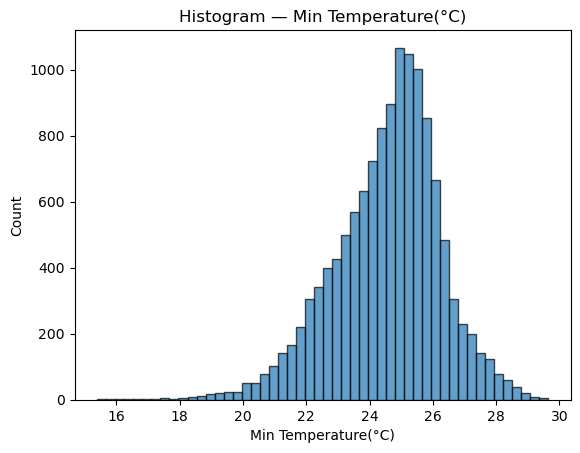

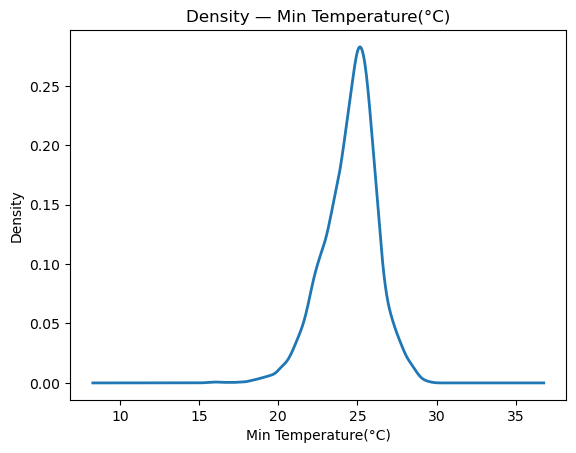

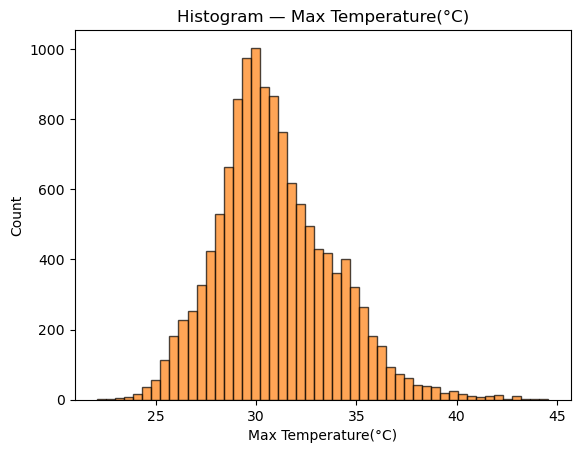

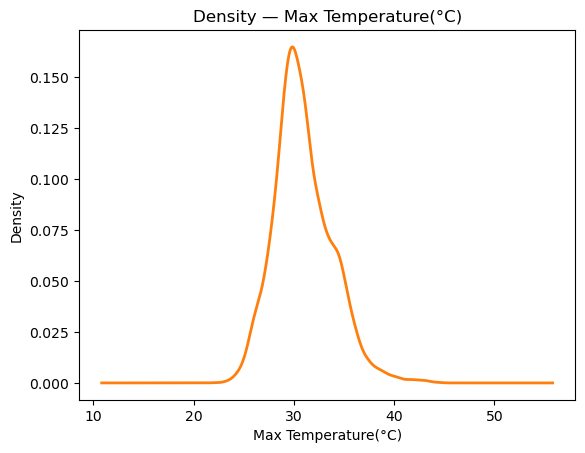

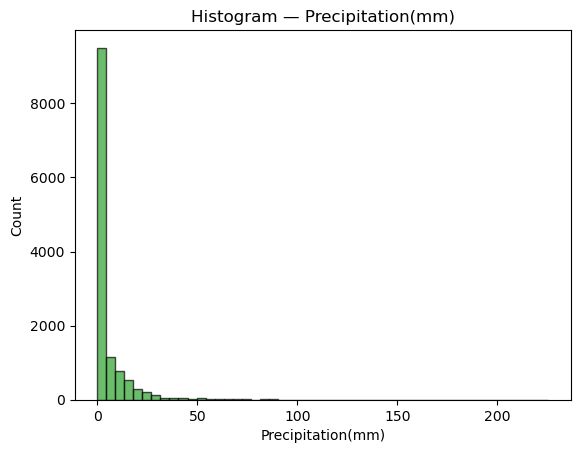

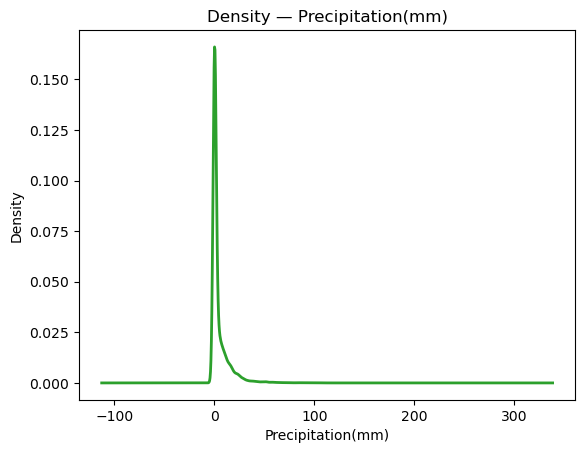

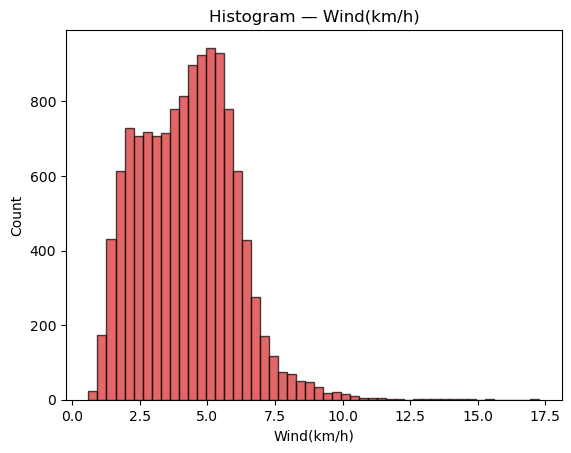

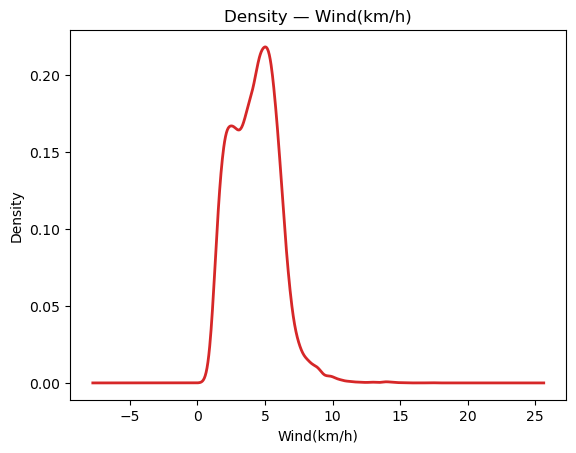

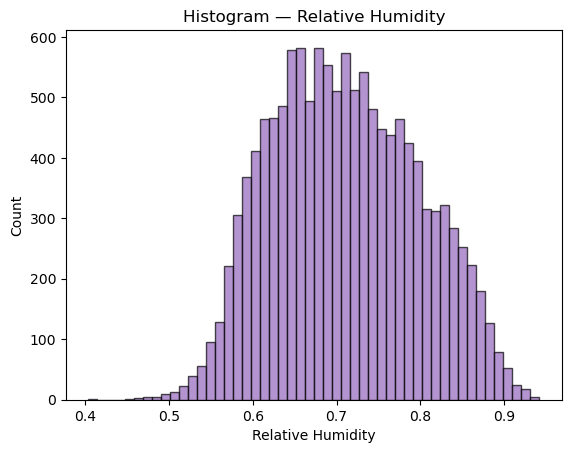

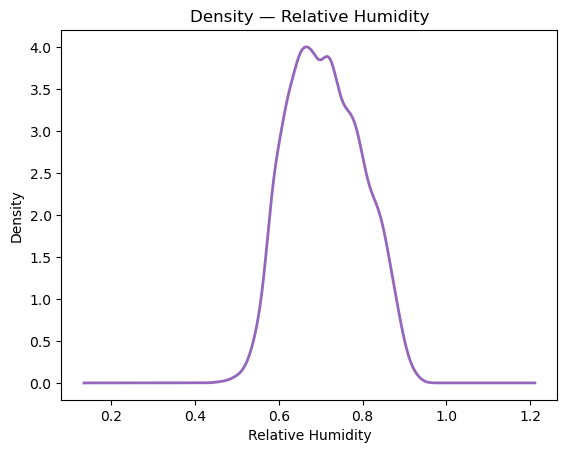

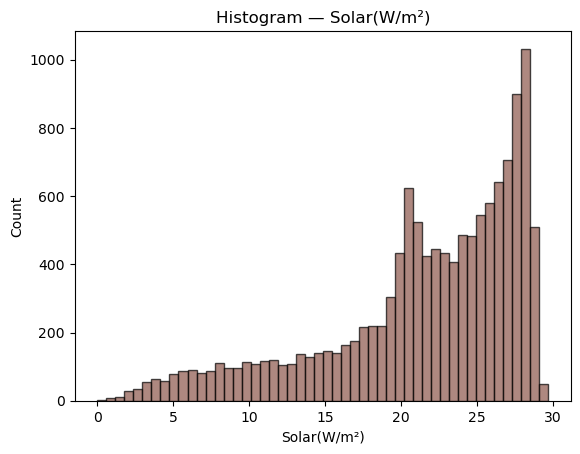

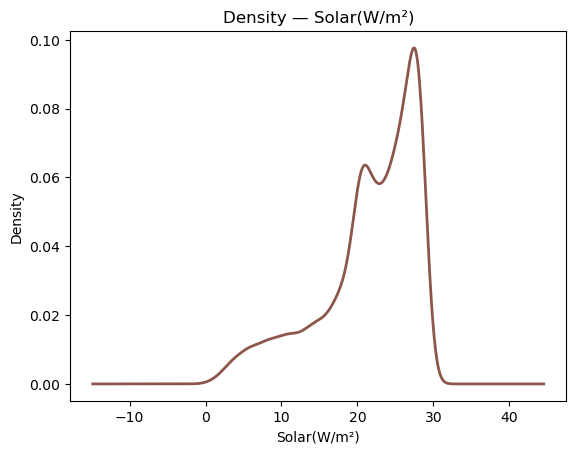

In [59]:
# Plotting Histograms and denstity plot to check if variables look normal or skewed
#Defining color maps so each predictor has its own color graph to distinguish from another predictor 
colors = plt.cm.tab10.colors
color_map={col:colors[i % len(colors)] for i , col in enumerate(NUM_COLS)}

for col in NUM_COLS:
    data = df[col].dropna()
    
    c= color_map[col]

    # Histogram
    plt.figure()
    plt.hist(data, bins=50, alpha=0.7,color=c,edgecolor="black")   
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Density (KDE)
    plt.figure()
    data.plot(kind="density",color=c,linewidth=2)
    plt.title(f"Density — {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


The histograms above show the distribution of each weather variable, highlighting the spread, central tendency, and presence of skewness or outliers. The overlaid density plots provide a smooth view of the underlying distribution, making it easier to compare variable shapes. Together, these plots reveal that temperature variables follow relatively normal-like distributions, while features such as precipitation and wind show skewness with extreme values, which may influence model performance.

**BOX/ WHISKERS PLOTS OUTLIER DETECTION**

Here trying to check for dots far from the box/whiskers = potential extreme events (e.g., heavy rain days, heat spikes).

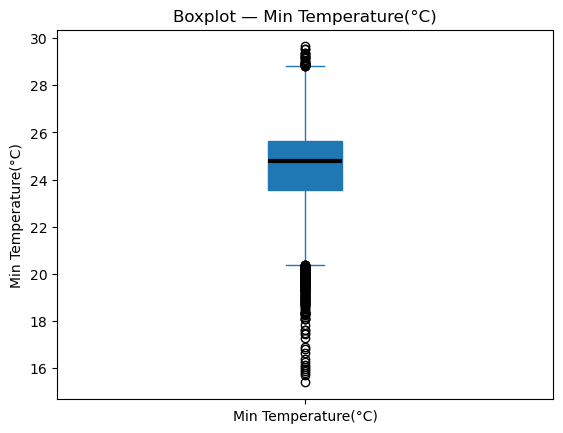

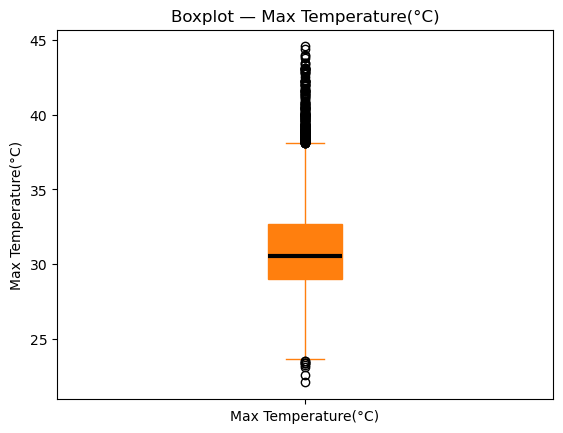

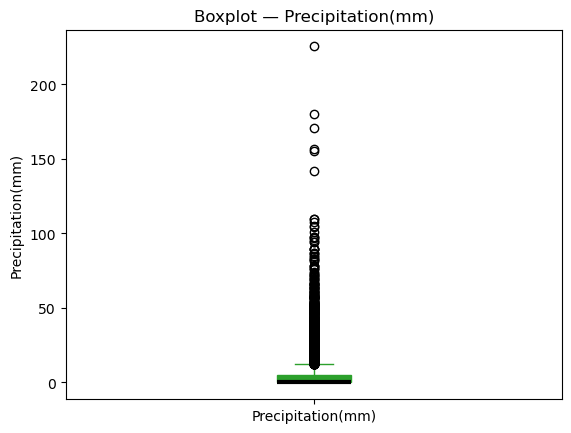

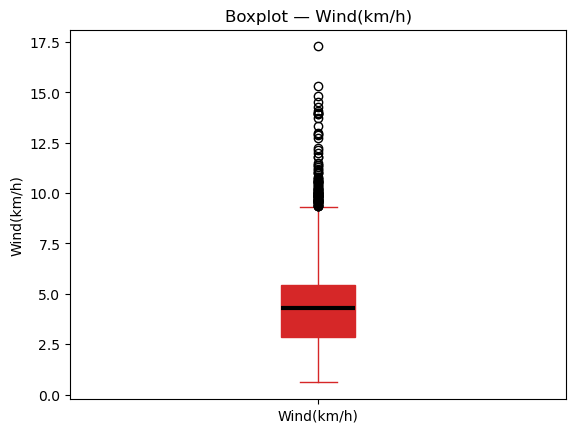

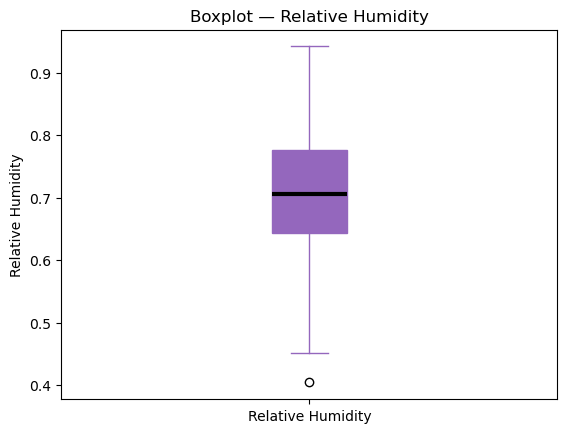

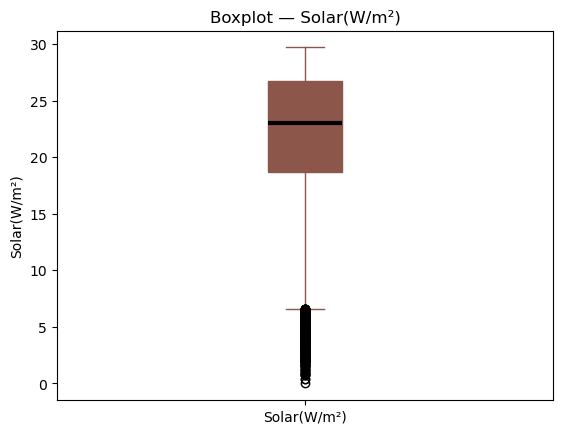

In [62]:

# Boxplots to Spot extreme (Outliers) values that might affect/ bias models.

# Defining the same color map as the above plots for consistancy 
colors = plt.cm.tab10.colors
color_map = {col: colors[i % len(colors)] for i, col in enumerate(NUM_COLS)}

# Boxplots
for col in NUM_COLS:
    data = df[col].dropna().values
    # pick color for this column
    c = color_map[col]  

    plt.figure()
    plt.boxplot(data,vert=True,tick_labels=[col],showfliers=True,patch_artist=True,
        # box fill + edge color
        boxprops=dict(facecolor=c, color=c),
        # median line in black
        medianprops=dict(color="black", linewidth=3),whiskerprops=dict(color=c),capprops=dict(color=c))
    plt.title(f"Boxplot — {col}")
    plt.ylabel(col)
    plt.show()



The boxplots above display the spread and outliers for each weather variable. Temperatures (min, max, and average) are mostly stable, with some extreme highs and lows at the tails. Precipitation is highly skewed, showing mostly low daily values but many extreme rainfall outliers. Wind and solar radiation also exhibit noticeable outliers, though within a moderate range, while relative humidity remains more balanced with fewer extremes. These patterns highlight where variables are consistent versus where rare extreme events may bias or influence forecasting models.

**TEMPORAL ANALYSIS**

Checking for temporal analysis to see if this reveals his reveals annual cycles (e.g., more rain in some months , more solar radiation in mid-year)

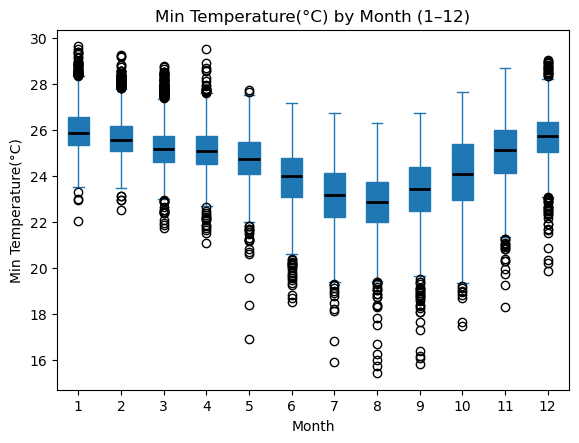

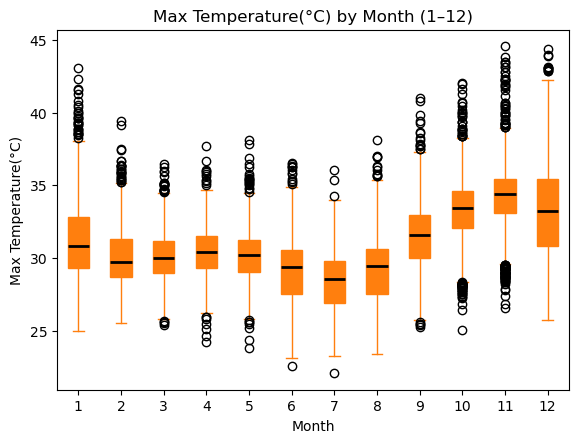

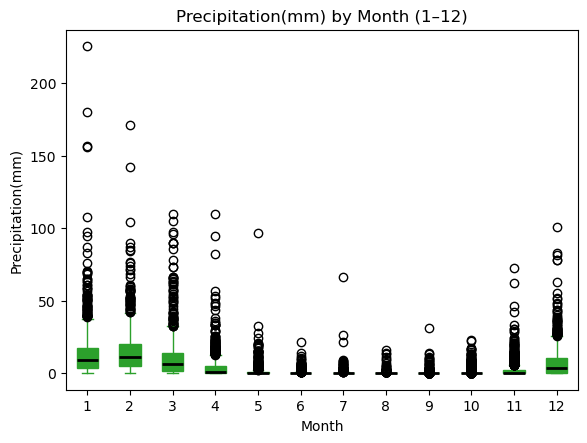

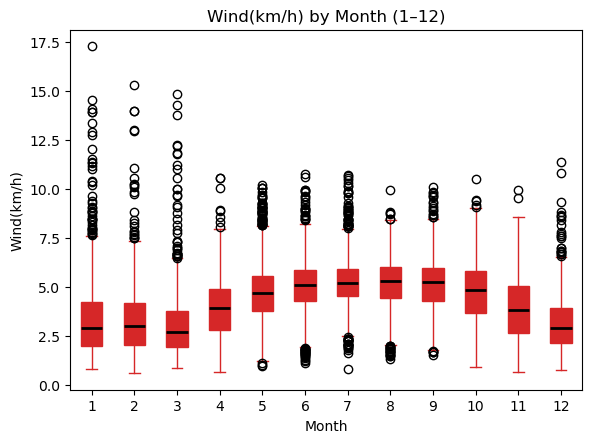

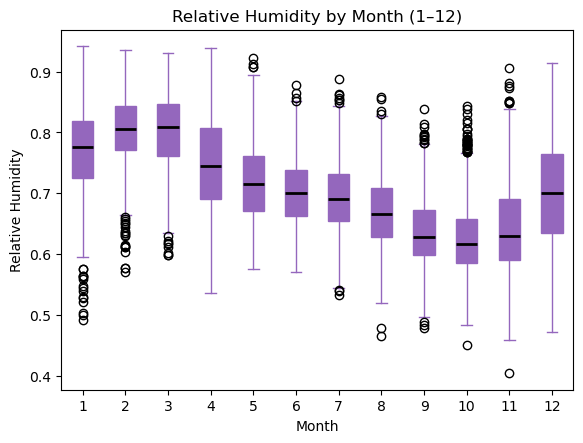

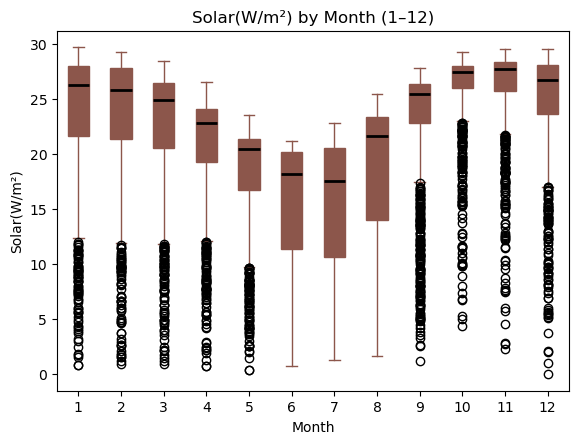

In [65]:

# Boxplots by month for each variable
if MONTH not in df.columns:
    df[MONTH] = df["Date"].dt.month



# color palette
colors = plt.cm.tab10.colors
color_map = {col: colors[i % len(colors)] for i, col in enumerate(NUM_COLS)}

for col in NUM_COLS:
    df.boxplot(
        column=col,
        by="Month",
        grid=False,
        patch_artist=True,   # allows filling with color
        boxprops=dict(facecolor=color_map[col], color=color_map[col]),
        whiskerprops=dict(color=color_map[col]),
        capprops=dict(color=color_map[col]),
        medianprops=dict(color="black", linewidth=2),
    )
    plt.title(f"{col} by Month (1–12)")
    plt.suptitle("")  
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()




The monthly boxplots above highlight clear seasonal patterns across all weather variables. Minimum, maximum, and average temperatures follow expected cycles, dipping mid-year (June–July) and peaking toward December–January. Precipitation is highly skewed, with most months showing low rainfall but extreme outliers during the rainy season. Wind speeds remain relatively stable with moderate variation, while relative humidity and solar radiation exhibit opposite seasonal trends humidity is higher in the early months, whereas solar intensity peaks later in the year. These temporal patterns are important for capturing seasonality in forecasting models.




Extreme Events, defining extremes using quantiles (e.g., “top 1% of max temperature values”

In [68]:
# Choosing which variables to flag for extremes
# top 1% max temperatures
# top 1% precipitation
# top 1% wind
extreme_values = {
    MAX_TEMP:0.99,   
    MIN_TEMP:0.99,
    PRECIP:0.99,   
    WIND:0.99,}   

# Creating the flags
for col, i in extreme_values.items():
    thresh = df[col].quantile(i)
    flag_col = f"Extreme_Days_{col}"
    df[flag_col] = df[col] > thresh
    print(f"{col}: threshold for top {int((1-i)*100)}% = {thresh:.3f}")

# Counting the number of days there was extreme events in the data set 
flag_cols = [c for c in df.columns if c.startswith("Extreme_Days_")]
extreme_counts = df[flag_cols].sum().sort_values(ascending=False)
print("\nNumber of days Extreme events occured :")
print(extreme_counts)


Max Temperature(°C): threshold for top 1% = 39.142
Min Temperature(°C): threshold for top 1% = 28.218
Precipitation(mm): threshold for top 1% = 49.311
Wind(km/h): threshold for top 1% = 8.950

Number of days Extreme events occured :
Extreme_Days_Max Temperature(°C)    129
Extreme_Days_Min Temperature(°C)    129
Extreme_Days_Wind(km/h)             129
Extreme_Days_Precipitation(mm)      128
dtype: int64


## 3. Time Series and Seasonal Patterns  

#### Hypotheses / Questions:

5. Do temperatures and other climate variables show clear seasonal patterns over the years?
6. Are there long-term trends in warming, cooling, or rainfall changes that emerge when comparing across decades?

#### Why it’s beneficial
Weather data is inherently temporal and seasonal. Distribution analysis reveals cycles (daily, monthly, yearly) and long-term trends. Rolling averages help detect climate change signals or data drift.
#### What we’re looking for
Autocorrelation – strong autocorrelation means past values are highly predictive of future ones.
Seasonal peaks – clear yearly or monthly cycles indicate seasonal features must be included.
Trend slopes – upward temperature trend shows stationarity is violated; linear regression without detrending may fail.
#### Impact on model choice
**General models:** Linear regression may work if lagged variables (e.g., yesterday’s temperature, last week’s average) and explicit seasonal terms are added, but it struggles when stationarity is violated. Time-series models such as ARIMA or LSTM are better suited for autocorrelated, seasonal data since they directly account for temporal dependencies. **Tree-based models** (Random Forest, Gradient Boosting) can also capture non-linear seasonality and long-term shifts without needing strict assumptions, making them more robust than plain regression for weather forecasting.

**Time series Decomposition**

Time series decomposition separates a dataset into seasonality, trend, and residuals. Seasonality captures repeating yearly cycles, trends show long-term increases or decreases, and residuals represent random noise that cannot be explained by either. This breakdown helps reveal both predictable patterns and unpredictable fluctuations in the data.

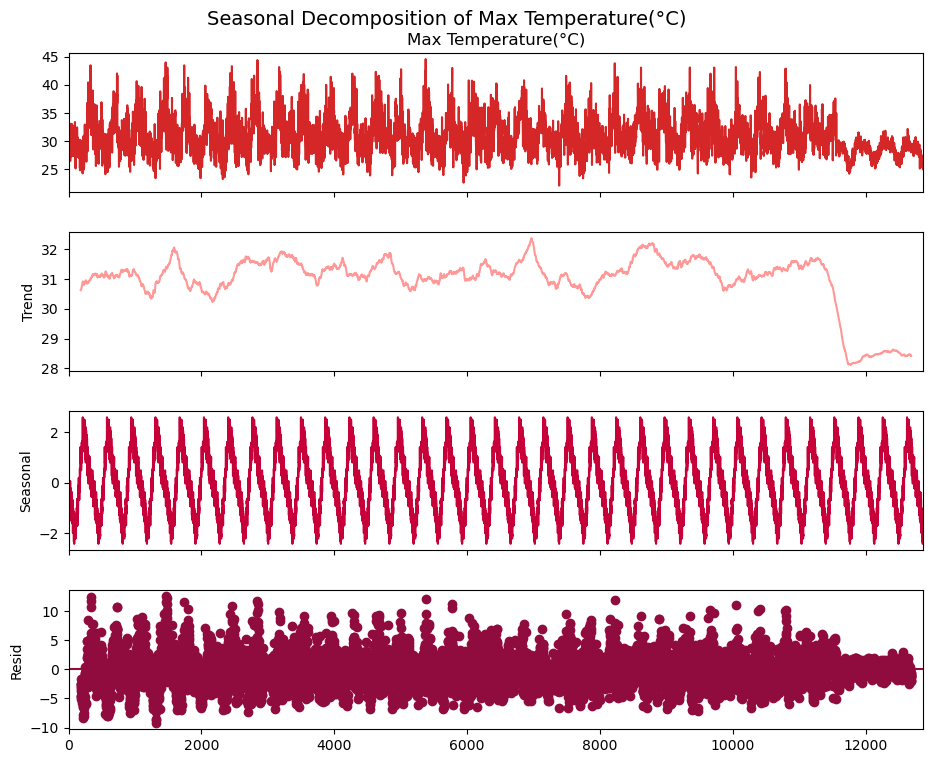

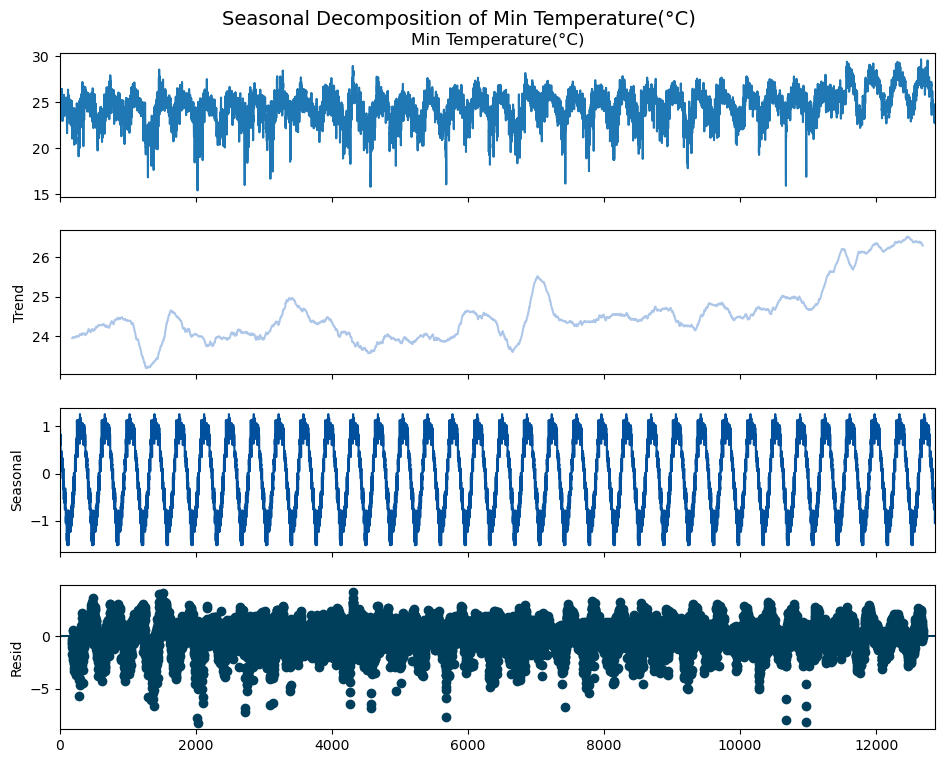

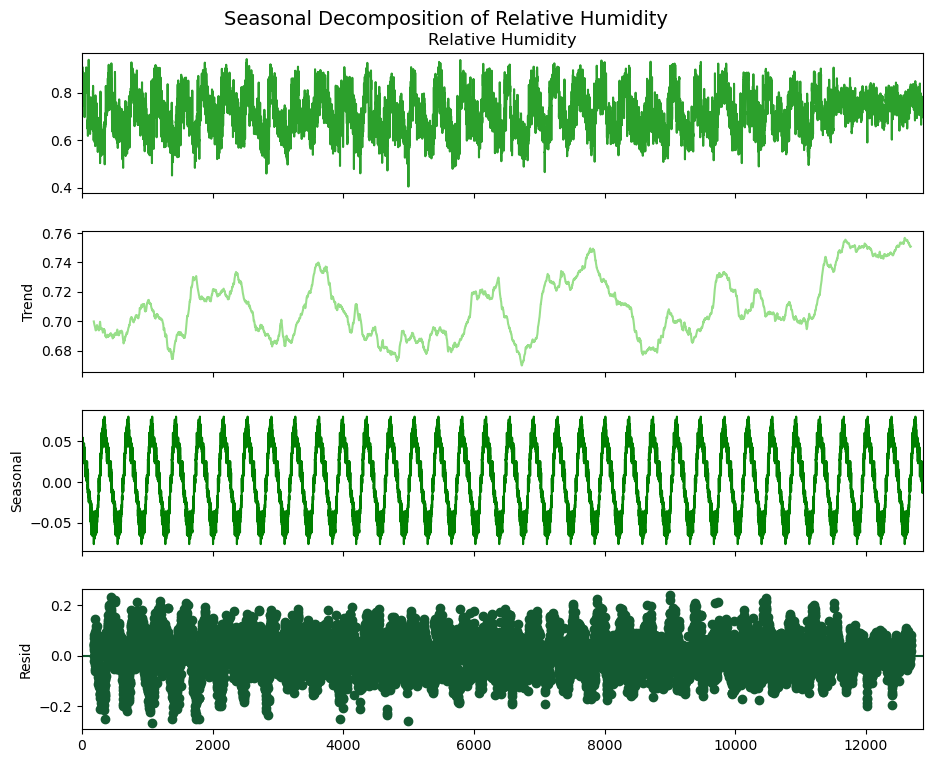

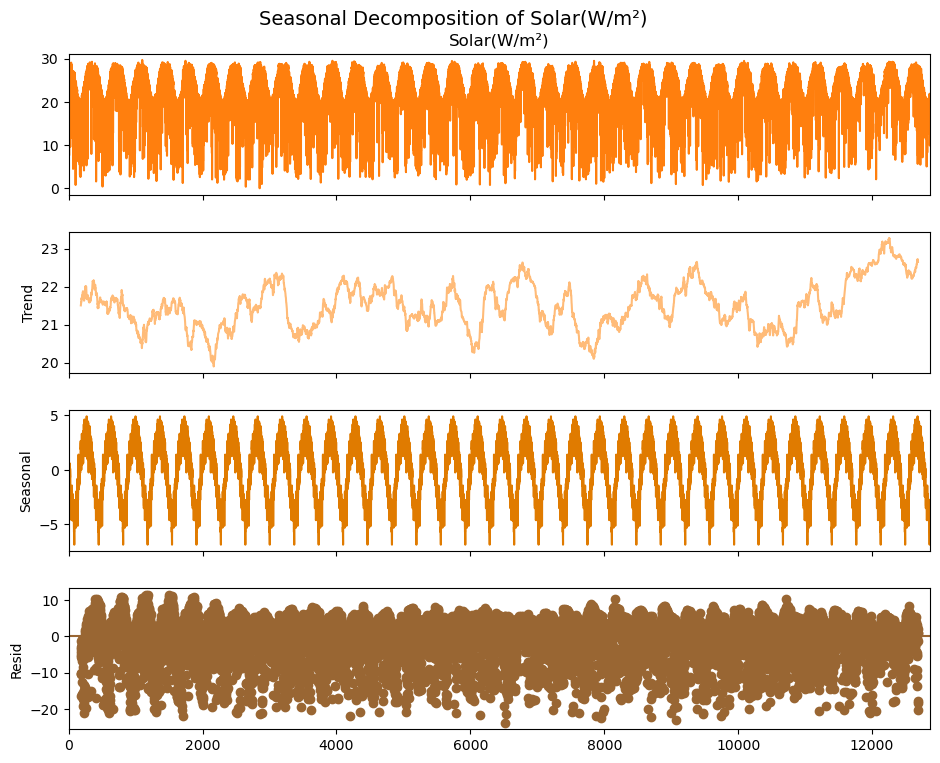

In [73]:
#This block of code performs seasonal decomposition for each selected variable (e.g., temperature, humidity, solar).
#The series is broken into trend, seasonal, and residual components using an additive model, with a period of 365 days to capture yearly cycles. 
#This helps to separate long-term trends from repeating seasonal effects and irregular noise.

# Variables worth decomposing
vars_to_decompose = [
    'Max Temperature(°C)',
    'Min Temperature(°C)',
    'Relative Humidity',
    'Solar(W/m²)'
]

# Defining custom colors (pick 4 sets for variety per variable)
color_sets = {
    'Max Temperature(°C)': ['#d62728', '#ff9896', '#c70039', '#900c3f'],  
    'Min Temperature(°C)': ['#1f77b4', '#aec7e8', '#00509e', '#003f5c'],  
    'Relative Humidity':   ['#2ca02c', '#98df8a', '#008000', '#145a32'],  
    'Solar(W/m²)':         ['#ff7f0e', '#ffbb78', '#e07b00', '#996633']   
}

for col in vars_to_decompose:
    result = seasonal_decompose(df[col], model='additive', period=365)

    fig = result.plot()
    fig.set_size_inches(10, 8)
    
    # Apply custom colors
    axes = fig.get_axes()
    for ax, color in zip(axes, color_sets[col]):
        for line in ax.get_lines():
            line.set_color(color)

    plt.suptitle(f"Seasonal Decomposition of {col}", fontsize=14)
    plt.show()




**Autocorrelation** 

Autocorrelation describes how the current value of a time series relates to its past values. It helps identify whether patterns repeat over time, which is critical for forecasting.

Positive autocorrelation: High values are followed by other high values, and low values by low values.

Negative autocorrelation: High values are followed by low values, and vice versa.

To detect autocorrelation, two main tools are used:

Autocorrelation Function (ACF) plot – shows correlations across many time lags.
Partial Autocorrelation Function (PACF) plot – shows the direct effect of specific lags after removing intermediate ones.

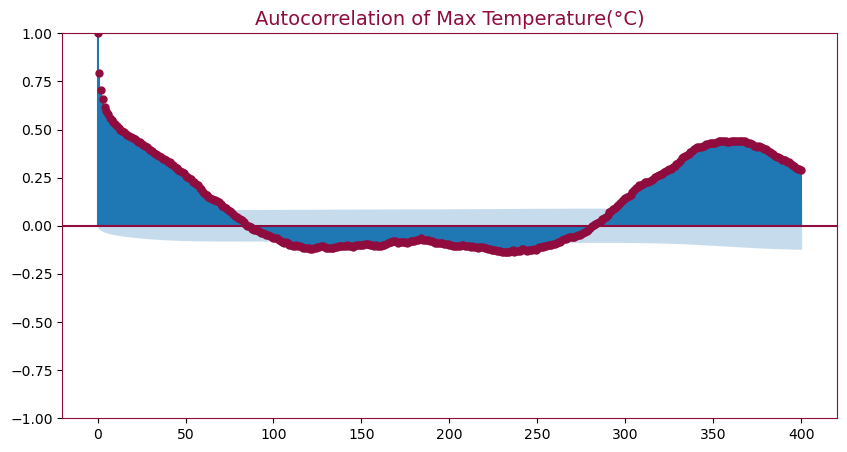

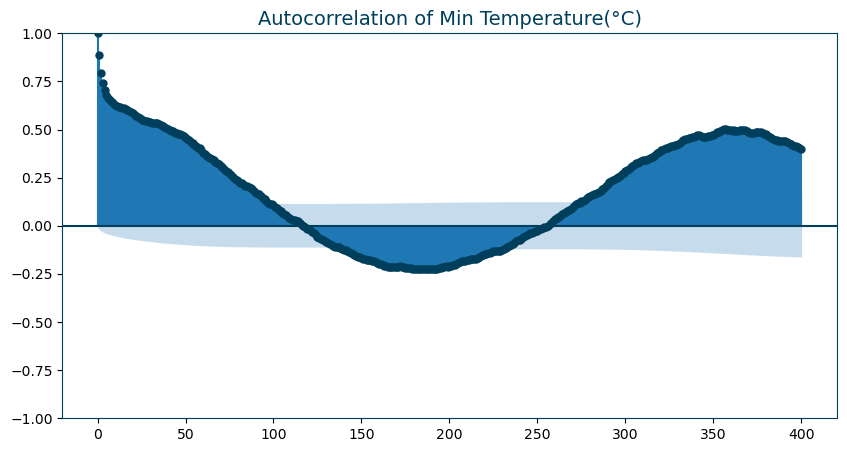

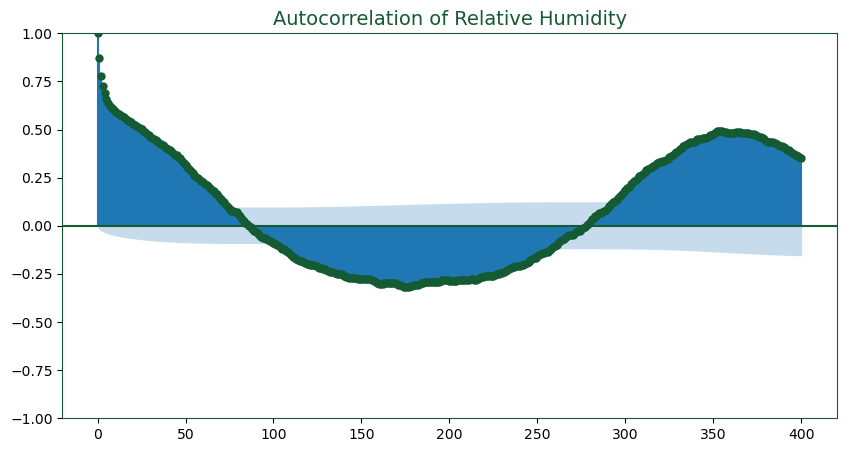

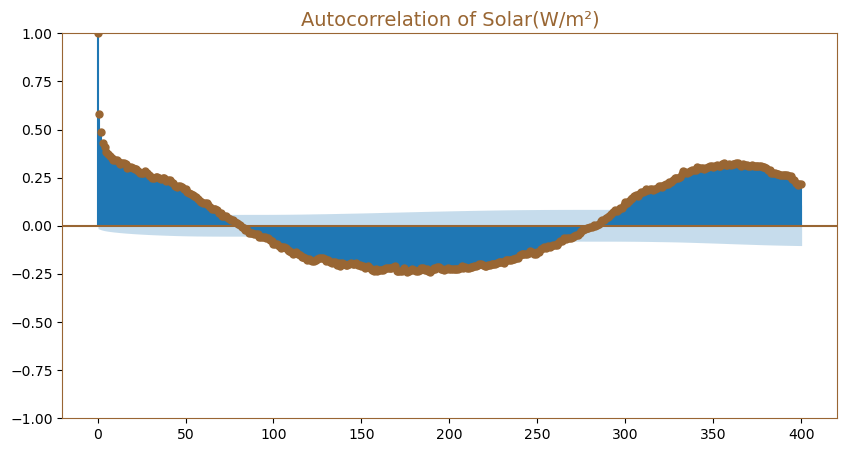

In [75]:
#This block of code generates Autocorrelation Function (ACF) plots for each variable, 
#showing how current values are correlated with past values across up to 400 lags (just over one year for daily data). 
#ACF helps detect seasonality, persistence, and repeating patterns in the dataset, which are important for forecasting.

# Variables to check
vars_to_check = [
    'Max Temperature(°C)',
    'Min Temperature(°C)',
    'Relative Humidity',
    'Solar(W/m²)'
]

# Assigning distinct colors for each variable
colors = {
    'Max Temperature(°C)': '#900c3f',
    'Min Temperature(°C)': '#003f5c',
    'Relative Humidity': '#145a32',
    'Solar(W/m²)': '#996633'
}

for col in vars_to_check:
    fig, ax = plt.subplots(figsize=(10,5))
    plot_acf(df[col], lags=400, ax=ax, color=colors[col])  
    
    # Title and styling
    plt.title(f"Autocorrelation of {col}", fontsize=14, color=colors[col])
    ax.spines['top'].set_color(colors[col])
    ax.spines['right'].set_color(colors[col])
    ax.spines['left'].set_color(colors[col])
    ax.spines['bottom'].set_color(colors[col])
    plt.show()


The autocorrelation plots for maximum temperature, minimum temperature, relative humidity, and solar radiation all show strong positive correlations at short lags, which gradually decay as the lag increases. This indicates that weather conditions on a given day are closely related to conditions on recent days. In addition, clear peaks reappear around lag ~365, confirming the presence of a strong annual seasonal cycle across these variables. The similarity in patterns for temperature, humidity, and solar radiation highlights that they share common seasonal drivers such as annual climatic cycles. These findings support the hypothesis that weather variables follow long-term seasonal trends and justify the inclusion of temporal features in the modelling stage.

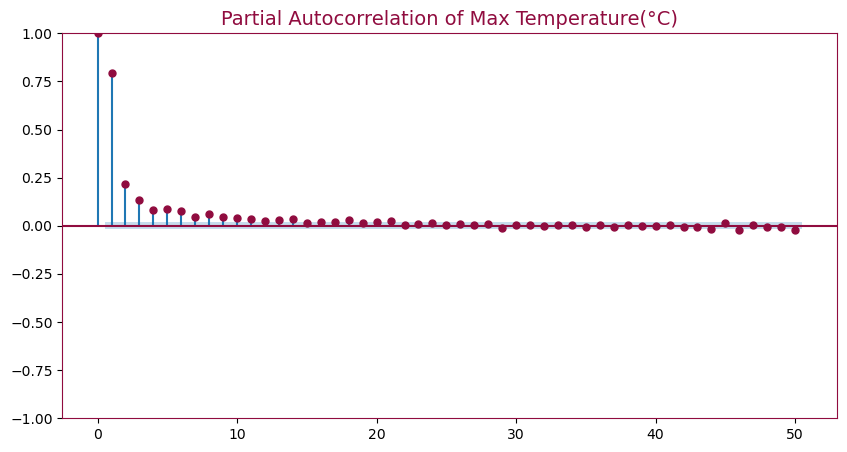

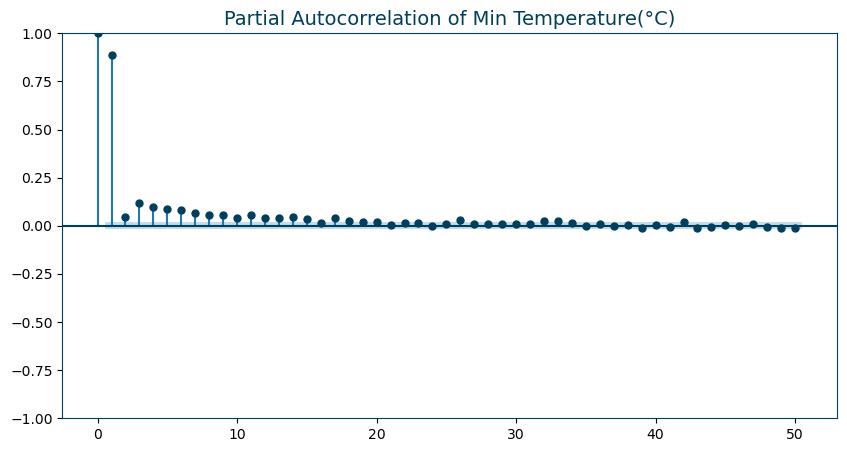

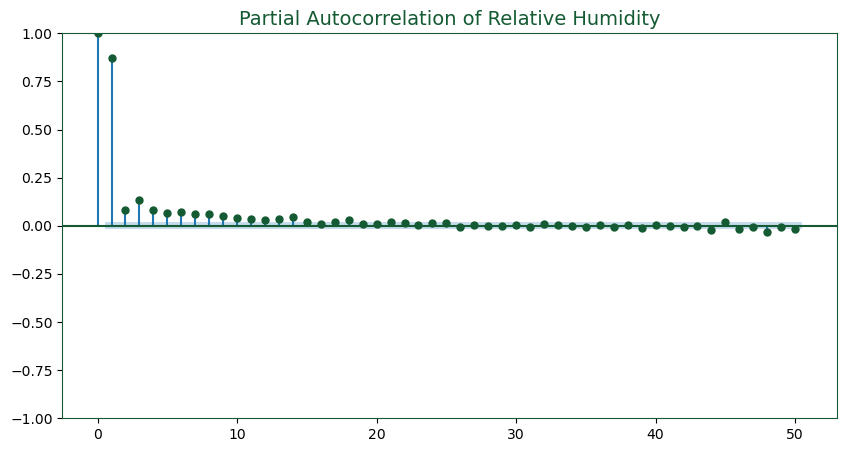

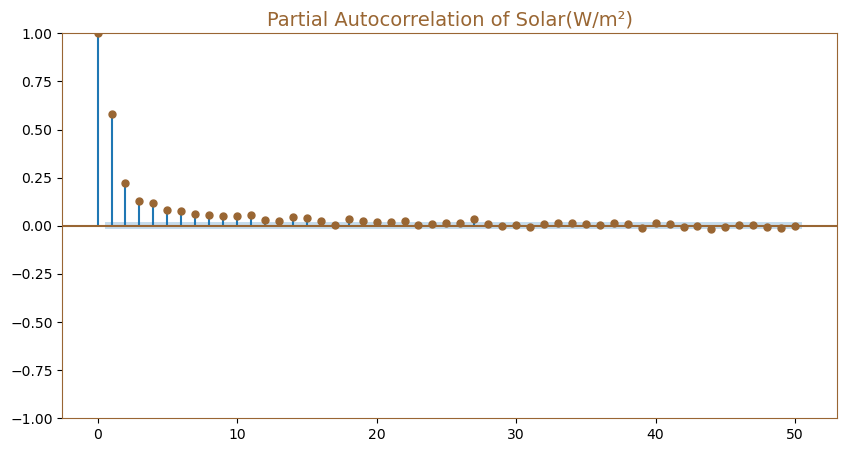

In [77]:
#This block of code produces Partial Autocorrelation Function (PACF) plots for each variable,
#focusing on the direct influence of specific lags (up to 50). 
#Unlike ACF, PACF removes the indirect effects of shorter lags, 
#making it clearer which recent past values directly affect the present. 
#This is useful for understanding short-term dependencies in weather variables.

# Variables to check

vars_to_check = [
    'Max Temperature(°C)',
    'Min Temperature(°C)',
    'Relative Humidity',
    'Solar(W/m²)'
]

# Assigning distinct colors for each variable
colors = {
    'Max Temperature(°C)': '#900c3f',
    'Min Temperature(°C)': '#003f5c',
    'Relative Humidity': '#145a32',
    'Solar(W/m²)': '#996633'
}

for col in vars_to_check:
    fig, ax = plt.subplots(figsize=(10,5))
    plot_pacf(df[col], lags=50, ax=ax, color=colors[col])  
    
    # Title and styling
    plt.title(f"Partial Autocorrelation of {col}", fontsize=14, color=colors[col])
    ax.spines['top'].set_color(colors[col])
    ax.spines['right'].set_color(colors[col])
    ax.spines['left'].set_color(colors[col])
    ax.spines['bottom'].set_color(colors[col])
    plt.show()


The partial autocorrelation plots show strong spikes at lag 1 for all variables, indicating that the immediate past day has the greatest direct influence on current values. Smaller but still visible correlations extend to short lags (up to around 5–7 days), suggesting short-term persistence in weather conditions. Beyond these lags, the PACF values drop close to zero, meaning that longer-term correlations are largely explained by the seasonal cycles already captured in the ACF. Together, the PACF results confirm that weather variables are strongly influenced by their most recent past values, while broader seasonal effects appear indirectly through repeated yearly cycles. This supports the inclusion of both short-term lagged features and longer-term seasonal indicators in the modelling stage.

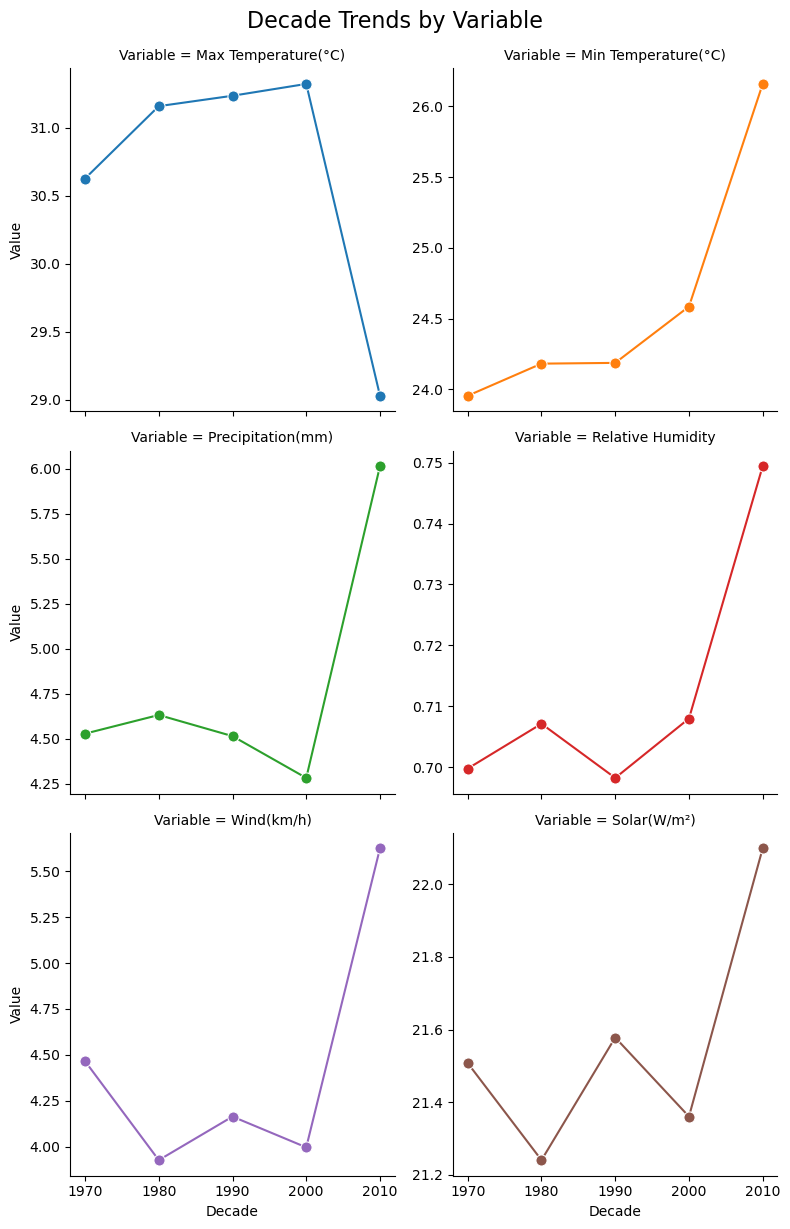

In [79]:
# Trend comparison across decades

# selecting the columns needed 
# keeping only columns that exist
# checking if values are numeric
# then create a decade key
cols = ['Max Temperature(°C)','Min Temperature(°C)','Precipitation(mm)',
        'Relative Humidity','Wind(km/h)','Solar(W/m²)']
cols = [c for c in cols if c in df.columns]                 
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')   
df['Decade'] = (df['Year'] // 10) * 10                      

# decade averages -> long form for faceting
decade_avg  = df.groupby('Decade')[cols].mean(numeric_only=True)
decade_long = decade_avg.reset_index().melt(
    id_vars='Decade', var_name='Variable', value_name='Value'
).dropna(subset=['Value'])

# Removing FutureWarning from seaborn/pandas about use_inf_as_na
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*", category=FutureWarning)

# Melting data for facet plotting
decade_long = decade_avg.reset_index().melt(id_vars="Decade", var_name="Variable", value_name="Value")

# Define color palette (one color per variable)
palette = dict(zip(cols,
    sns.color_palette("tab10", n_colors=len(cols))  # tab10 gives distinct colors
))

# Facet plot with custom colors
plot = sns.FacetGrid(
    decade_long,
    col="Variable",
    col_wrap=2,
    sharey=False,
    height=4
)

# Map lineplot and use palette by variable
plot.map_dataframe(
    sns.lineplot,
    x="Decade",
    y="Value",
    hue="Variable",
    marker="o",
    markersize=8,
    palette=palette,
    legend=False
)

plot.fig.suptitle("Decade Trends by Variable", fontsize=16, y=1.02)
plt.show()



Overall, the temporal analysis demonstrates that the dataset contains both short-term persistence and long-term seasonality, reinforced by clear decade-level variability. These insights support the hypothesis that weather patterns are influenced by recent past values, seasonal cycles, and gradual climate shifts. For modelling, this confirms the need for approaches that can capture complex temporal dependencies and interactions, such as Random Forests, which are capable of leveraging both lagged predictors and non-linear seasonal effects.

## 4. Correlation relationship and Analysis 

#### Hypotheses / Questions:

7. Is temperature strongly correlated with solar radiation and humidity?
8. Do wind and precipitation add predictive power or are they weakly related?

#### Why it’s beneficial
Shows how predictors interact with temperature (the target). Identifies multicollinearity (predictors too correlated with each other). Helps prioritize which variables should go into the model.
#### What we’re looking for
Correlation with target (Max Temp/Min Temp): High correlation (e.g., solar vs Max Temp = 0.7)  strong predictor. Low correlation (e.g., wind vs Max Temp = 0.1)  may not add much value.
Multicollinearity among predictors: If two predictors are highly correlated (e.g., humidity vs precipitation, r > 0.85), one may be redundant.
Partial correlations: Example: humidity negatively correlated with Max Temp, even when solar is controlled.
#### Impact on model choice
**Tree-based models** (Random Forest, XGBoost) handle multicollinearity better by automatically choosing dominant splits and down-weighting redundant predictors. Neural networks can capture nonlinear interactions (e.g., Max Temp rising with solar only when humidity is low), but require larger datasets to generalize well.
**General models:** Linear RegressionAssumes low multicollinearity. High collinearity inflates coefficients and produces unstable results (VIF > 10 = problematic). Strong predictor–target correlations mean regression could perform well, but redundancy must be managed.


In [84]:
#Computing Correlation Matrices
#Checking both Pearson (linear relationships) and Spearman (monotonic relationships, more robust to non-linearity).



# Numeric columns of interest
numeric_cols = ['Min Temperature(°C)', 'Max Temperature(°C)', 
                'Precipitation(mm)', 'Wind(km/h)', 'Relative Humidity', 'Solar(W/m²)']

# Computing correlations
pearson_corr = df[numeric_cols].corr(method='pearson')
spearman_corr = df[numeric_cols].corr(method='spearman')

# Converting to DataFrames for better visualization
pearson_df = pd.DataFrame(pearson_corr)
spearman_df = pd.DataFrame(spearman_corr)

# Displaying them side by side 

print("Pearson Correlation Matrix")
display(pearson_df)

print(" Spearman Correlation Matrix")
display(spearman_df)



Pearson Correlation Matrix


Min Temperature(°C)  Max Temperature(°C)  \
Min Temperature(°C)                1.000                0.032   
Max Temperature(°C)                0.032                1.000   
Precipitation(mm)                  0.286               -0.201   
Wind(km/h)                         0.069               -0.424   
Relative Humidity                  0.361               -0.487   
Solar(W/m²)                        0.135                0.614   

                     Precipitation(mm)  Wind(km/h)  Relative Humidity  \
Min Temperature(°C)              0.286       0.069              0.361   
Max Temperature(°C)             -0.201      -0.424             -0.487   
Precipitation(mm)                1.000      -0.050              0.568   
Wind(km/h)                      -0.050       1.000             -0.204   
Relative Humidity                0.568      -0.204              1.000   
Solar(W/m²)                     -0.079      -0.254             -0.309   

                     Solar(W/m²)  
Min Temperature(°C)        0.135  
Max Temperature(°C)        0.614  
Precipitation(mm)         -0.079  
Wind(km/h)                -0.254  
Relative Humidity         -0.309  
Solar(W/m²)                1.000

 Spearman Correlation Matrix


Min Temperature(°C)  Max Temperature(°C)  \
Min Temperature(°C)                1.000                0.063   
Max Temperature(°C)                0.063                1.000   
Precipitation(mm)                  0.477               -0.273   
Wind(km/h)                        -0.011               -0.398   
Relative Humidity                  0.382               -0.510   
Solar(W/m²)                        0.186                0.630   

                     Precipitation(mm)  Wind(km/h)  Relative Humidity  \
Min Temperature(°C)              0.477      -0.011              0.382   
Max Temperature(°C)             -0.273      -0.398             -0.510   
Precipitation(mm)                1.000      -0.297              0.797   
Wind(km/h)                      -0.297       1.000             -0.249   
Relative Humidity                0.797      -0.249              1.000   
Solar(W/m²)                     -0.112      -0.269             -0.294   

                     Solar(W/m²)  
Min Temperature(°C)        0.186  
Max Temperature(°C)        0.630  
Precipitation(mm)         -0.112  
Wind(km/h)                -0.269  
Relative Humidity         -0.294  
Solar(W/m²)                1.000

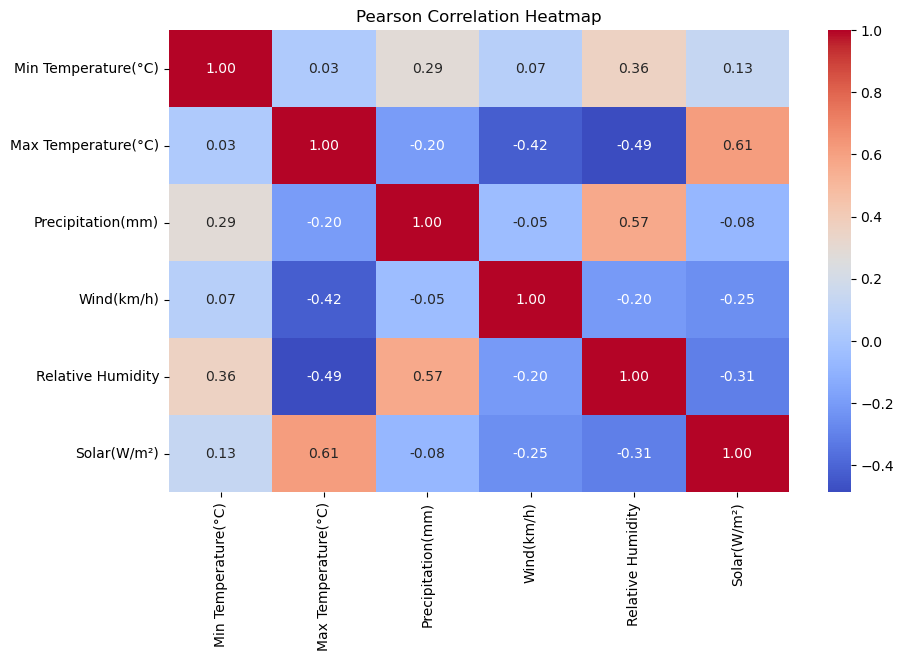

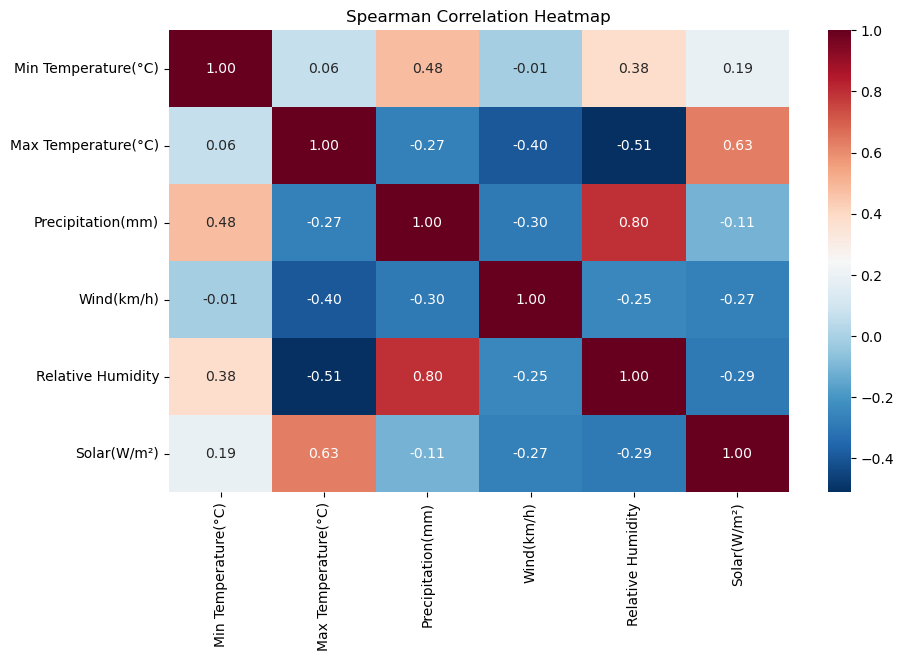

In [85]:
# Visualizing the relationship between variables 


# Pearson Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Spearman Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(spearman_corr, annot=True, cmap="RdBu_r", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


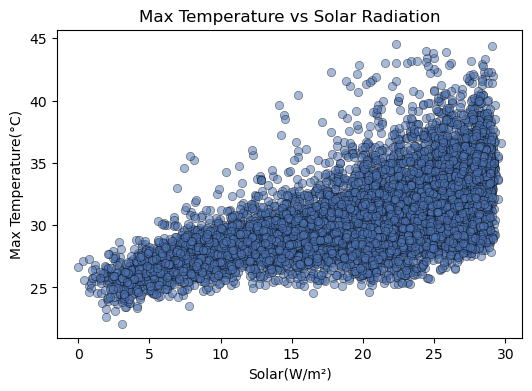

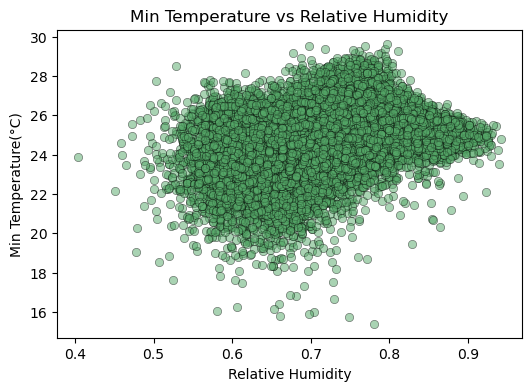

In [86]:
#Scatterplots for Hypothesis Testing
#Max Temp vs. Solar
#Min Temp vs. Humidity

# Scatterplot Max Temp vs Solar
plt.figure(figsize=(6,4))
sns.scatterplot(x='Solar(W/m²)', y='Max Temperature(°C)', data=df,color=sns.color_palette("deep")[0], alpha=0.5, edgecolor="black")
plt.title("Max Temperature vs Solar Radiation")
plt.show()

# Scatterplot Min Temp vs Humidity
plt.figure(figsize=(6,4))
sns.scatterplot(x='Relative Humidity', y='Min Temperature(°C)', data=df,color=sns.color_palette("deep")[2], alpha=0.5, edgecolor="black")
plt.title("Min Temperature vs Relative Humidity")
plt.show()


**CORRELATION ANALYSIS:** 

The Pearson and Spearman heatmaps both reveal strong positive correlations between solar radiation and maximum temperature, confirming that higher solar intensity drives higher daytime temperatures. This is further illustrated in the scatterplot of Max Temperature vs Solar Radiation, which shows a clear upward trend. Similarly, minimum temperature shows a moderate negative relationship with relative humidity, reflected in the scatterplot where higher humidity is associated with slightly lower minimum temperatures. Wind speed and average temperature display a weak relationship, though some outliers suggest occasional spikes in wind under moderate temperatures. Overall, the combined heatmaps and scatterplots confirm that solar radiation and humidity are the most influential predictors for temperature, while wind and precipitation have weaker, less stable relationships.


# Data preprocessing

Some additional preprocessing needs to happen before training the model. We will import the cleaned CSV file from earlier

In [90]:
df = pd.read_csv('weatherdata_cleaned.csv')
df.head(5)

Date  Max Temperature  Min Temperature  Precipitation  Wind  \
0  1979-01-01           28.419           25.154         13.125 6.932   
1  1979-01-02           27.973           24.853         23.355 6.081   
2  1979-01-03           27.772           25.469         39.468 6.015   
3  1979-01-04           26.534           24.851         23.830 6.422   
4  1979-01-05           28.343           24.974          9.089 6.162   

   Relative Humidity  Solar  
0              0.824 21.584  
1              0.870 19.647  
2              0.874 23.400  
3              0.886 13.279  
4              0.844 24.058

Outlier Handling + Scaling

Outlier Handling with IQR Clipping

The IQRClipper transformer calculates the interquartile range (IQR) for each feature and sets lower/upper bounds at 1.5 × IQR below Q1 and above Q3.

Any values outside this range are clipped (not removed) to the boundary.

This ensures extreme outliers do not distort the scale of features, while still retaining all observations.

After clipping, features are scaled using StandardScaler (z-score normalisation).

This standardises each feature to have mean 0 and variance 1, which helps many models learn more effectively by removing bias from features measured on different scales.

Optionally, MinMaxScaler can be used instead if normalisation to a 0–1 range is more appropriate.



In [93]:

import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# --- Outlier handler (IQR clipper, keeps data but caps extremes) ---
class IQRClipper(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.bounds_ = {}

    def fit(self, X, y=None):
        df = pd.DataFrame(X, columns=self.cols) if not isinstance(X, pd.DataFrame) else X
        for col in self.cols:
            q1, q3 = df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            self.bounds_[col] = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
        return self

    def transform(self, X):
        df = pd.DataFrame(X, columns=self.cols) if not isinstance(X, pd.DataFrame) else X.copy()
        for col, (low, high) in self.bounds_.items():
            df[col] = df[col].clip(lower=low, upper=high)
        return df

#  pipeline
def make_preprocessor(feature_names):
    return Pipeline([
        ("outlier_clip", IQRClipper(cols=feature_names)),   
        ("scaler", StandardScaler()),                      
        
    ])


checking column names 

In [95]:
print(df.columns)

Index(['Date', 'Max Temperature', 'Min Temperature', 'Precipitation', 'Wind',
       'Relative Humidity', 'Solar'],
      dtype='object')


setting numeric features

In [97]:
numeric_features = [ 'Max Temperature', 'Min Temperature', 'Precipitation', 'Wind',
       'Relative Humidity', 'Solar']


Running the preprocessing

In [99]:
preprocessor = make_preprocessor(numeric_features)

print("Before preprocessing:")
print(df[numeric_features].describe())

processed_features = preprocessor.fit_transform(df[numeric_features])

print("\nAfter preprocessing:")
print(pd.DataFrame(processed_features, columns=numeric_features).describe())


Before preprocessing:
       Max Temperature  Min Temperature  Precipitation      Wind  \
count        12868.000        12868.000      12868.000 12868.000   
mean            30.935           24.548          4.676     4.249   
std              2.896            1.698         10.363     1.758   
min             22.082           15.399          0.000     0.597   
25%             29.030           23.539          0.000     2.847   
50%             30.557           24.773          0.283     4.275   
75%             32.660           25.650          5.006     5.436   
max             44.570           29.645        225.427    17.281   

       Relative Humidity     Solar  
count          12868.000 12868.000  
mean               0.710    21.488  
std                0.087     6.456  
min                0.404     0.000  
25%                0.643    18.669  
50%                0.706    23.039  
75%                0.776    26.708  
max                0.942    29.688  

After preprocessing:
       Max

Create a new df using these scaled and trimmed features

In [101]:
old_df = df

df = pd.DataFrame(processed_features, columns=numeric_features)
old_df.head(5)

Date  Max Temperature  Min Temperature  Precipitation  Wind  \
0  1979-01-01           28.419           25.154         13.125 6.932   
1  1979-01-02           27.973           24.853         23.355 6.081   
2  1979-01-03           27.772           25.469         39.468 6.015   
3  1979-01-04           26.534           24.851         23.830 6.422   
4  1979-01-05           28.343           24.974          9.089 6.162   

   Relative Humidity  Solar  
0              0.824 21.584  
1              0.870 19.647  
2              0.874 23.400  
3              0.886 13.279  
4              0.844 24.058

In [102]:
df['Date'] = old_df['Date']
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

Max Temperature  Min Temperature  Precipitation  Wind  Relative Humidity  \
0           -0.888            0.359          2.082 1.573              1.307   
1           -1.048            0.176          2.082 1.076              1.829   
2           -1.119            0.550          2.082 1.038              1.879   
3           -1.562            0.175          2.082 1.275              2.016   
4           -0.915            0.249          1.327 1.123              1.539   

   Solar       Date  
0  0.001 1979-01-01  
1 -0.310 1979-01-02  
2  0.293 1979-01-03  
3 -1.332 1979-01-04  
4  0.399 1979-01-05

Visualize trimming changes

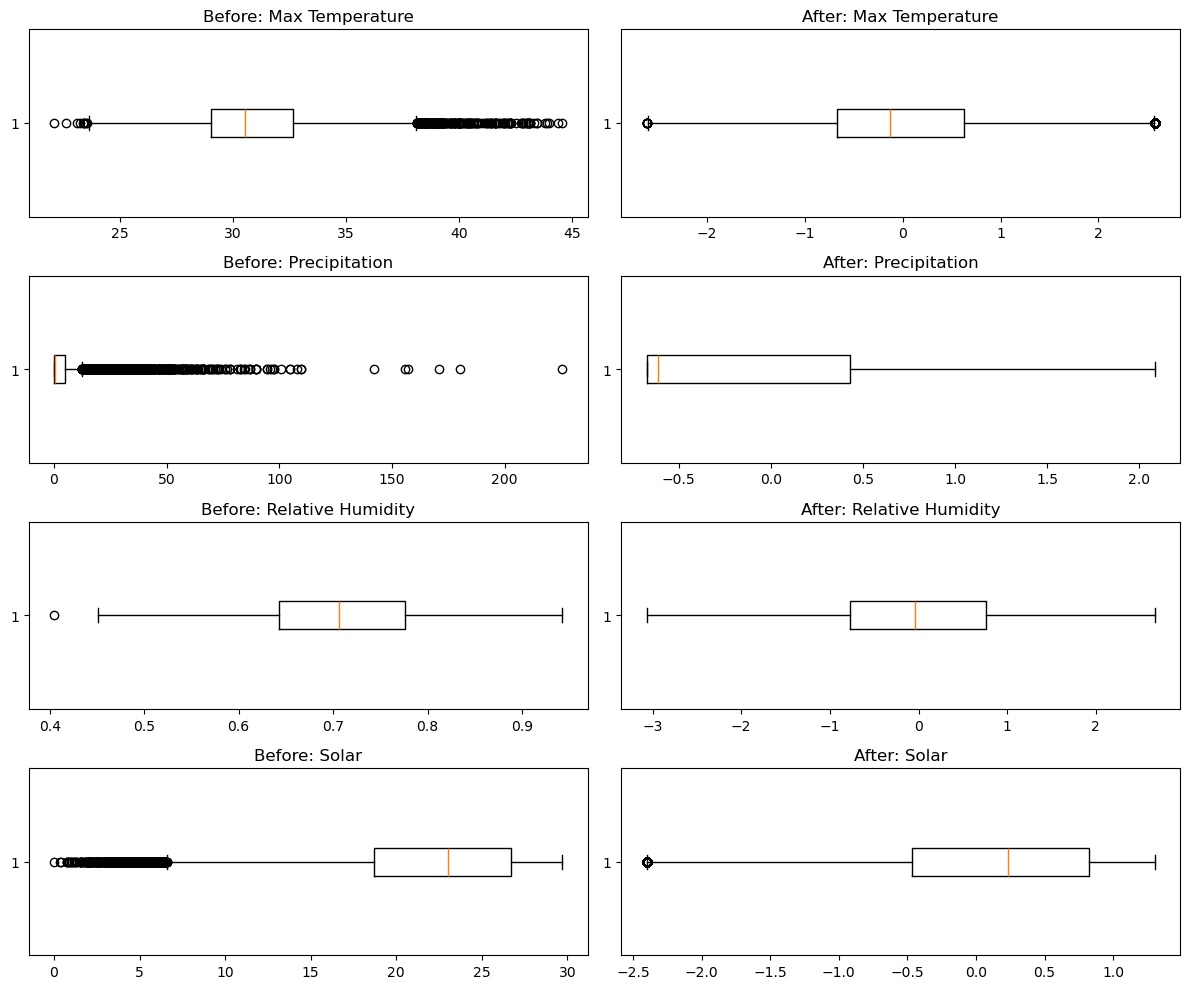

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Picked some columns to visualise
features_to_plot = ["Max Temperature", "Precipitation", "Relative Humidity", "Solar"]

fig, axes = plt.subplots(len(features_to_plot), 2, figsize=(12, 10))

for i, feat in enumerate(features_to_plot):
    # Boxplot before preprocessing
    axes[i,0].boxplot(old_df[feat].dropna(), vert=False)
    axes[i,0].set_title(f"Before: {feat}")
    
    # Boxplot after preprocessing
    axes[i,1].boxplot(df[feat].dropna(), vert=False)
    axes[i,1].set_title(f"After: {feat}")

plt.tight_layout()
plt.show()


# Feature Engineering

Additional date and month features added to improve predictions. The Sin and Cos functions add continuity to the dates and months, allowing the model to view the start and end points as being close together.

In [107]:
df['Month'] = df['Date'].dt.month
df['Day Of Year'] = df['Date'].dt.dayofyear

df['Month Sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month Cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Day Of Year Sin'] = np.sin(2 * np.pi * df['Day Of Year'] / 365)
df['Day Of Year Cos'] = np.cos(2 * np.pi * df['Day Of Year'] / 365)

Defining Target Columns

In [109]:
target_columns = ['Max Temperature', 'Min Temperature']

Creating "lagged" features to improve predictions. One of the biggest determining factors for temperature on a given day is the previous day's temperature. This adds a feature to each row with the target temperature from the previous day, as well as the average target temperature from the previous week. Newly created null values are also dropped

In [111]:
def create_lag(num_days, target_columns):
    
    for target in target_columns:
        df[f'{target}_lag_{num_days}'] = df[target].shift(num_days)

def create_rolling_lag(num_days, target_columns):
    
    for target in target_columns:
        df[f'{target}_rolling_lag_{num_days}'] = df[target].shift(1).rolling(window=num_days).mean()

In [112]:
lags = [1, 2, 3]
rolling_lags = [7, 14, 30]

for i in lags:
    create_lag(i, target_columns)

for i in rolling_lags:
    create_rolling_lag(i, target_columns)
    
df_clean = df.dropna().reset_index(drop=True)

Prining and saving the model-ready preprocessed dataframe as a CSV

In [114]:
print(df_clean.head(5))

   Max Temperature  Min Temperature  Precipitation   Wind  Relative Humidity  \
0           -0.377            0.545          0.201  0.324              0.792   
1           -0.120            0.441          0.450 -0.032              0.918   
2            0.138            1.136          0.469 -0.051              0.788   
3           -0.562            0.842          2.082  1.022              1.208   
4           -0.782            0.548          2.082  1.804              1.188   

   Solar       Date  Month  Day Of Year  Month Sin  ...  \
0  0.954 1979-01-31      1           31      0.500  ...   
1  0.860 1979-02-01      2           32      0.866  ...   
2  1.037 1979-02-02      2           33      0.866  ...   
3  0.612 1979-02-03      2           34      0.866  ...   
4  0.964 1979-02-04      2           35      0.866  ...   

   Max Temperature_lag_2  Min Temperature_lag_2  Max Temperature_lag_3  \
0                 -0.532                  0.635                 -0.591   
1               

In [115]:
df_clean.to_csv('weatherdata_preprocessed.csv', index=False)

# Model Building 

In [117]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

Import dataset and print Target and Feature columns

In [119]:
df_clean = pd.read_csv('weatherdata_preprocessed.csv')
feature_columns = df.drop(['Max Temperature', 'Min Temperature', 'Date'], axis=1).columns.to_list()

print(f"Target Columns: {target_columns}")
print(f"Feature Columns: {feature_columns}")

Target Columns: ['Max Temperature', 'Min Temperature']
Feature Columns: ['Precipitation', 'Wind', 'Relative Humidity', 'Solar', 'Month', 'Day Of Year', 'Month Sin', 'Month Cos', 'Day Of Year Sin', 'Day Of Year Cos', 'Max Temperature_lag_1', 'Min Temperature_lag_1', 'Max Temperature_lag_2', 'Min Temperature_lag_2', 'Max Temperature_lag_3', 'Min Temperature_lag_3', 'Max Temperature_rolling_lag_7', 'Min Temperature_rolling_lag_7', 'Max Temperature_rolling_lag_14', 'Min Temperature_rolling_lag_14', 'Max Temperature_rolling_lag_30', 'Min Temperature_rolling_lag_30']


Split dataset into Training and Testing

In [121]:
split_idx = int(len(df_clean) * 0.8)
train_data = df_clean.iloc[:split_idx]
test_data = df_clean.iloc[split_idx:]

X_train = train_data[feature_columns]
y_train = train_data[target_columns]

X_test = test_data[feature_columns]
y_test = test_data[target_columns]

Define base model and use gridsearch to find Optimal parameters

In [123]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

base_model = MultiOutputRegressor(RandomForestRegressor(random_state=42, n_jobs=-1))

In [124]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param_grid = {
    'estimator__n_estimators': [250, 300, 350],
    'estimator__max_depth': [18, 20, 22],
    'estimator__min_samples_split': [3, 4, 5, 6, 7],
    'estimator__min_samples_leaf': [1, 2, 3, 4]
}

tscv = TimeSeriesSplit(n_splits=3)
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=tscv,
    scoring='r2',
    n_jobs=1,
    verbose=1
)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

print("\nBest hyperparameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param.replace('estimator__', '')}: {value}")
print(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\Users\user\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best hyperparameters found:
  max_depth: 22
  min_samples_leaf: 3
  min_samples_split: 3
  n_estimators: 350
Best cross-validation R² score: 0.8492


Fitting the model to make predictions

In [126]:
y_test_pred = model.predict(X_test)

Basic Model Evaluation and performance metrics

In [128]:


print("\nOptimized Model Performance:")
for i, target in enumerate(target_columns):
    test_rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i]))
    test_r2 = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
    print(f"{target}: RMSE = {test_rmse:.2f}°C, R² = {test_r2:.3f}")


Optimized Model Performance:
Max Temperature: RMSE = 0.58°C, R² = 0.597
Min Temperature: RMSE = 0.38°C, R² = 0.843


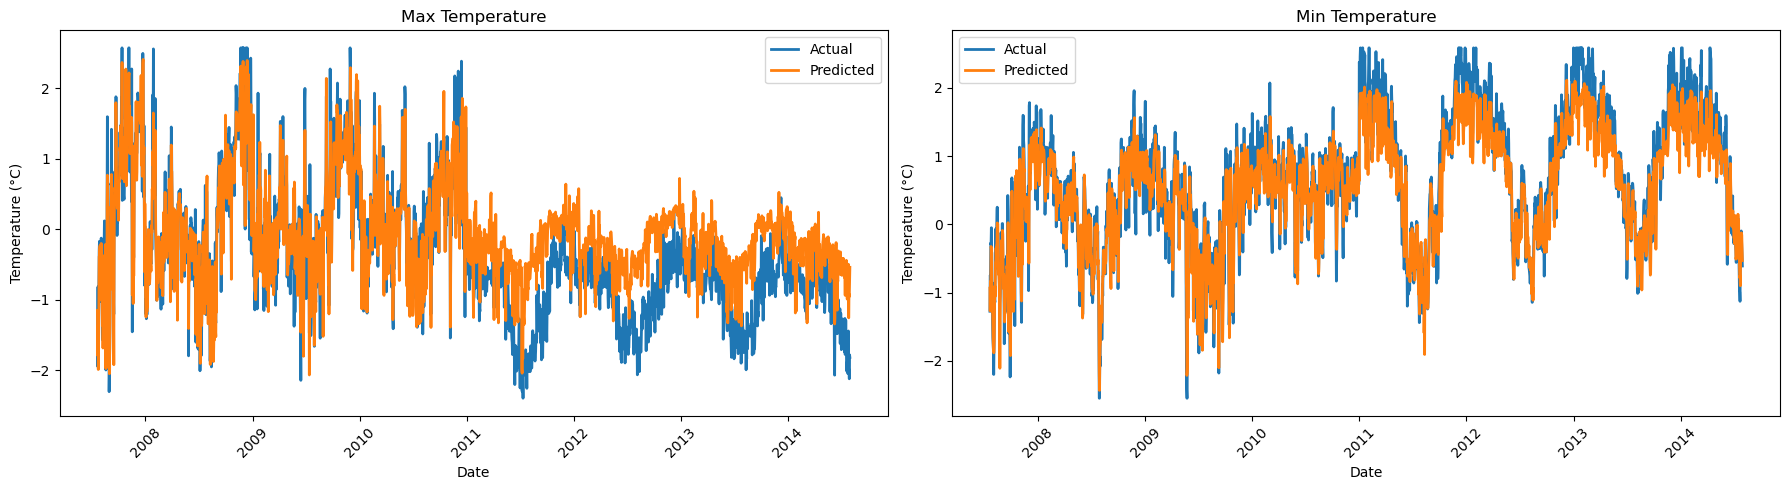

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

for i, target in enumerate(target_columns):
    test_data.loc[:, 'Date'] = pd.to_datetime(test_data['Date'])
    axes[i].plot(test_dates, y_test.iloc[:, i].values, label='Actual', linewidth=2)
    axes[i].plot(test_dates, y_test_pred[:, i], label='Predicted', linewidth=2)
    axes[i].set_title(target)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Temperature (°C)')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Model Evaluation and Testing

 #### 1. Cross-validation (k-fold)

In [132]:

'''
This section performs 5-fold cross-validation to evaluate the model.
- The dataset is split into 5 equal parts (folds).
- For each fold:
    * The model is trained on 4/5 of the data.
    * The remaining 1/5 is used for testing.
- This process is repeated 5 times, each with a different test fold.
- We collect the R² score (goodness of fit) for each fold.
- Finally, we calculate the mean R² across all folds,
  which gives a more reliable estimate of model performance
  than a single train/test split.
'''

kf = KFold(n_splits=5, shuffle=False)  
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print("Cross-validation R² scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))


Cross-validation R² scores: [0.85104743 0.83611498 0.85930248 0.87341866 0.86287054]
Mean CV R²: 0.8565508179049756


#### 2. Key evaluation Matrics (MAE, MAPE,R_SQUARED) 

In [134]:
'''
This section evaluates the model’s predictions for each target variable.
- Loops over all target columns (e.g., Max Temp, Min Temp).
- Extracts the true values (y_test) and predicted values (y_test_pred).
- Calculates three key evaluation metrics:
    * MAE  (Mean Absolute Error) - average size of errors in °C.
    * MAPE (Mean Absolute Percentage Error) - average % error relative to true values.
    * R²   (Coefficient of Determination) - how well predictions fit actual values.
- Prints the metrics for each target, formatted for readability.
'''

for i, target in enumerate(target_columns):
    y_true = y_test.iloc[:, i]
    y_pred = y_test_pred[:, i]
    
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    print(f"\n{target}:")
    print(f"  MAE  = {mae:.2f} °C")
    print(f"  MAPE = {mape:.2f} %")
    print(f"  R²   = {r2_score(y_true, y_pred):.3f}")



Max Temperature:
  MAE  = 0.45 °C
  MAPE = 110.66 %
  R²   = 0.597

Min Temperature:
  MAE  = 0.30 °C
  MAPE = 106.81 %
  R²   = 0.843


#### 3. Model Performance and Error Patterns

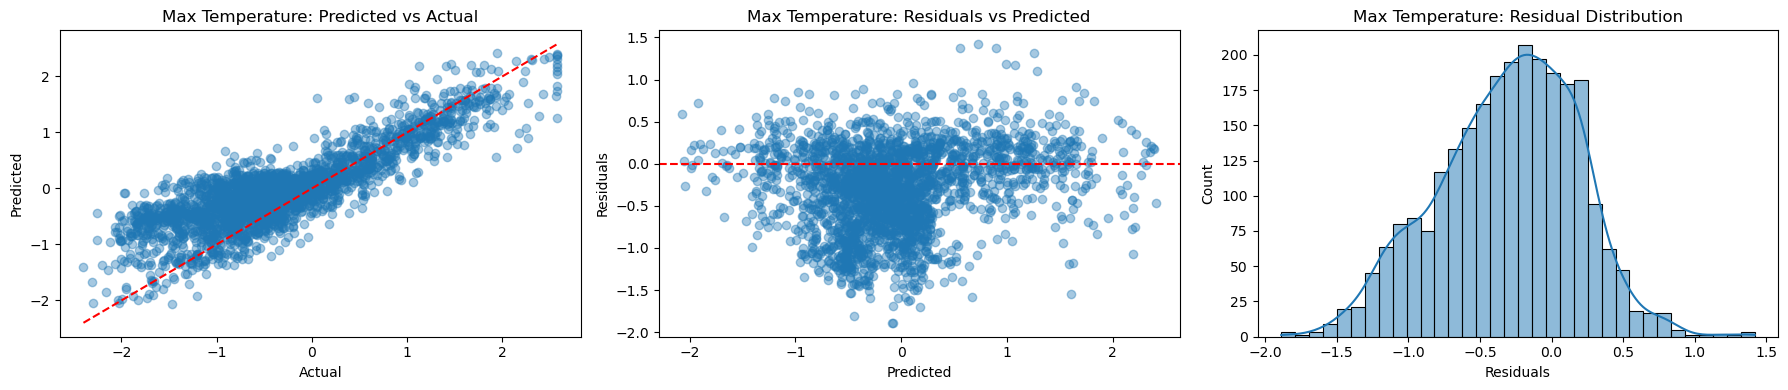

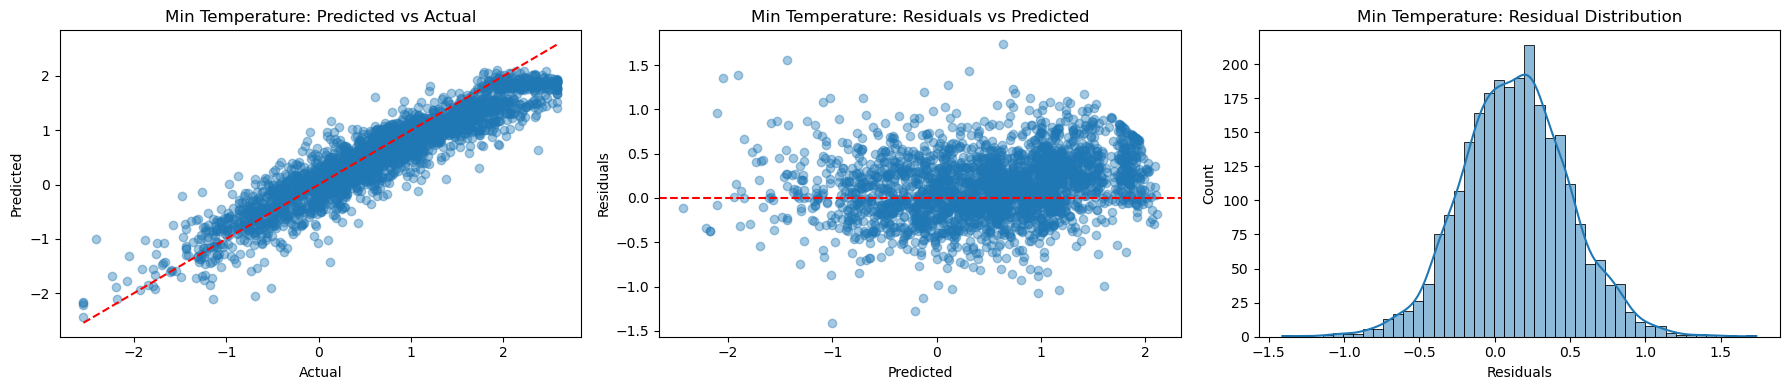

In [136]:
'''
This section generates diagnostic plots for each target variable.
The goal is to visually check model performance and error patterns:
1. Predicted vs Actual (parity plot):
   - Compares true vs predicted values.
   - Points close to the red diagonal line = good predictions.
2. Residuals vs Predicted:
   - Plots errors (residuals) against predicted values.
   - Should look like random scatter around 0 (no visible pattern).
   - Patterns/trends would suggest model bias.
3. Residual Distribution (histogram + KDE):
   - Shows how residuals are distributed.
   - A roughly symmetric bell-shaped curve centered at 0 is ideal.
'''

for i, target in enumerate(target_columns):
    y_true = y_test.iloc[:, i]
    y_pred = y_test_pred[:, i]
    residuals = y_true - y_pred

    fig, ax = plt.subplots(1, 3, figsize=(18, 4))
    
    # Predicted vs Actual (parity plot)
    ax[0].scatter(y_true, y_pred, alpha=0.4)
    ax[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    ax[0].set_title(f"{target}: Predicted vs Actual")
    ax[0].set_xlabel("Actual")
    ax[0].set_ylabel("Predicted")
    
    # Residuals vs Predicted
    ax[1].scatter(y_pred, residuals, alpha=0.4)
    ax[1].axhline(0, color='r', linestyle='--')
    ax[1].set_title(f"{target}: Residuals vs Predicted")
    ax[1].set_xlabel("Predicted")
    ax[1].set_ylabel("Residuals")
    
    # Histogram of Residuals
    sns.histplot(residuals, kde=True, ax=ax[2])
    ax[2].set_title(f"{target}: Residual Distribution")
    ax[2].set_xlabel("Residuals")
    
    plt.tight_layout()
    plt.show()

#### 4. Feature Impontance 

In [138]:
'''
Feature Importances for MultiOutput Random Forest (clean Top-N plots)

What this does:
- Works whether our model is a bare RandomForestRegressor, a Pipeline, or a
  MultiOutputRegressor(RandomForestRegressor).
- For multi-output, it extracts the Random Forest used for each target and
  plots a separate Top-N importance chart (so labels don't overlap).
- For single "overall" view, it also computes an average importance
  across targets (optional: set `PLOT_OVERALL=True`).

Requirements:
- `model` is our fitted model
- `feature_columns` is a list of input feature names in the same order as X
- `target_columns` is a list of our target names (e.g., ["Max Temp", "Min Temp"])
'''

from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# how many top features to show per target
# also shows an averaged-importance plot across all targets
TOP_N = 15          
PLOT_OVERALL = True 


In [139]:
def _get_final_estimator(m):
    """Return the final estimator if `m` is a Pipeline; else return `m`."""
    if isinstance(m, Pipeline):
        # Try common names, otherwise just take the last step
        if 'regressor' in m.named_steps:
            return m.named_steps['regressor']
        return list(m.named_steps.values())[-1]
    return m

def _get_rf_for_target(model, target_idx=0):
    """
    Given a possibly wrapped model, return the RandomForestRegressor
    used for the specified target index.
    """
    base = _get_final_estimator(model)
    if isinstance(base, MultiOutputRegressor):
        est = base.estimators_[target_idx]
        # in case each sub-estimator is also a Pipeline
        return _get_final_estimator(est)  
    # single-output case
    return base

def _get_feature_importances_for_target(model, target_idx):
    """Returning a numpy array of feature importances for a given target index."""
    rf = _get_rf_for_target(model, target_idx)
    if not hasattr(rf, "feature_importances_"):
        raise AttributeError("Underlying estimator does not expose .feature_importances_. "
                             "Ensure you are using RandomForestRegressor (or similar).")
    return rf.feature_importances_

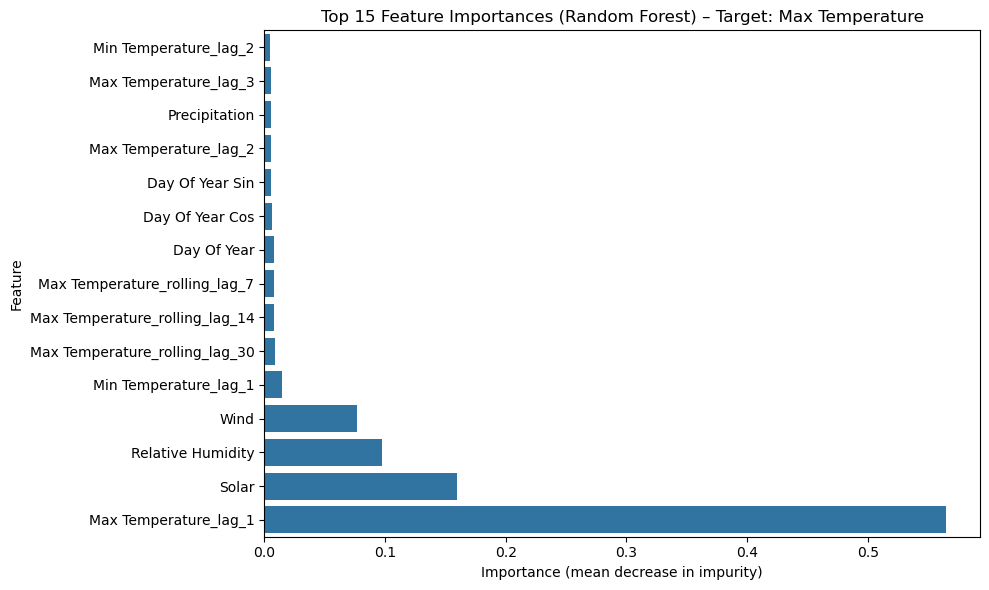

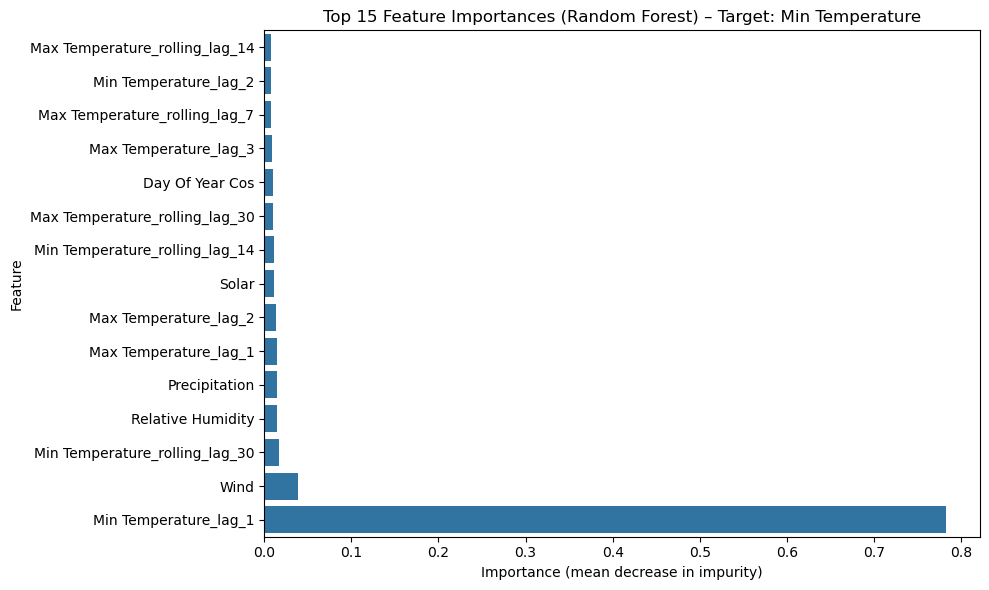

In [140]:

# Per-target plots

for i, target in enumerate(target_columns):
    # 1) fetch importances for this target
    importances = _get_feature_importances_for_target(model, i)

    # 2) map to feature names and sort
    feat_imp = pd.Series(importances, index=feature_columns).sort_values(ascending=False)

    # 3) keep only Top-N for readability
    top_feat_imp = feat_imp.head(TOP_N).iloc[::-1]  

    # 4) plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_feat_imp.values, y=top_feat_imp.index)
    plt.title(f"Top {TOP_N} Feature Importances (Random Forest) – Target: {target}")
    plt.xlabel("Importance (mean decrease in impurity)")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

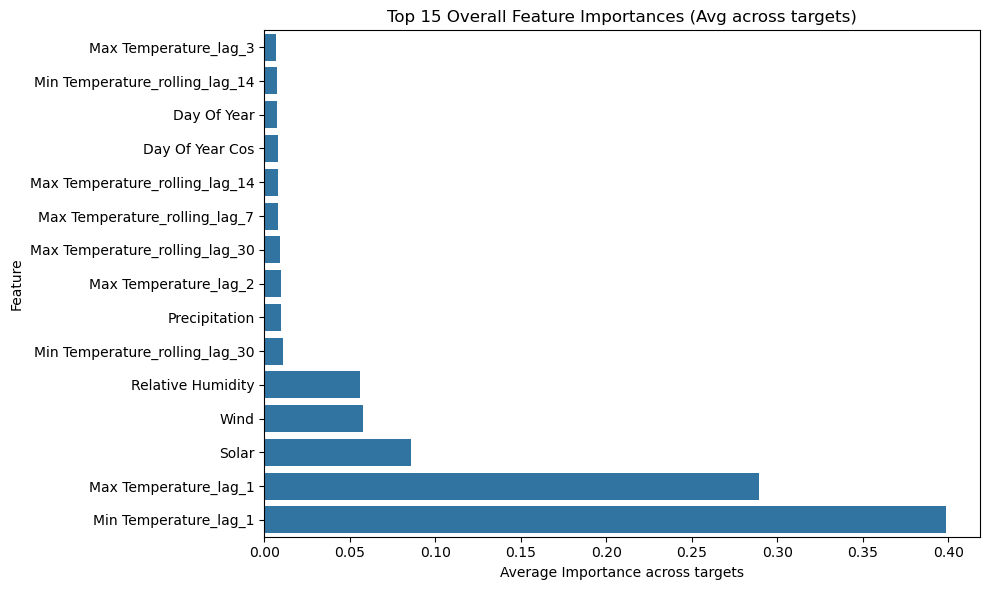

In [141]:

# Overall (average across targets)

if PLOT_OVERALL:
    # If single-output, this still works (len(target_columns) == 1)
    all_imps = []
    for i in range(len(target_columns)):
        all_imps.append(_get_feature_importances_for_target(model, i))
    # shape: [n_targets, n_features]
    all_imps = np.vstack(all_imps)  
    mean_imp = all_imps.mean(axis=0)

    overall = pd.Series(mean_imp, index=feature_columns).sort_values(ascending=False)
    top_overall = overall.head(TOP_N).iloc[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_overall.values, y=top_overall.index)
    plt.title(f"Top {TOP_N} Overall Feature Importances (Avg across targets)")
    plt.xlabel("Average Importance across targets")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

## Learning Curve (Bias vs Variance check)

Shows training vs validation error as training size increases.
Helps detect overfitting/underfitting.

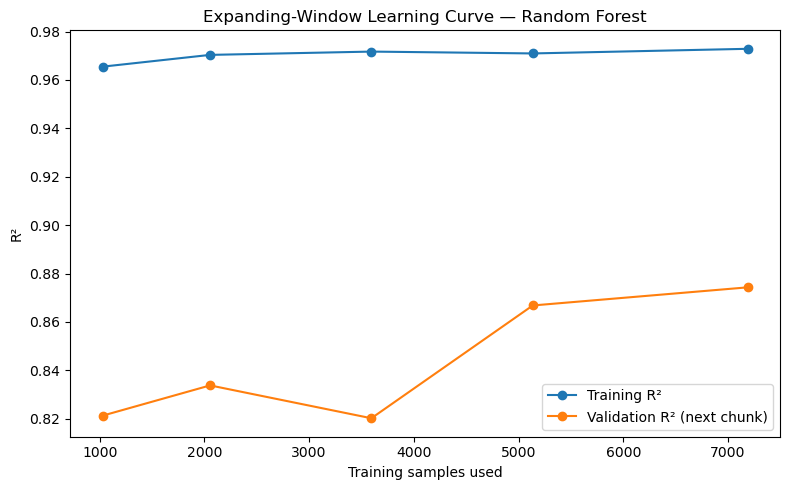

In [144]:

'''
Custom learning curve (expanding-window approach) for Random Forest

Purpose:
- Shows how our model performance (R²) changes as the training set grows.
- Useful for diagnosing underfitting/overfitting and checking if more data
  would improve validation results.

How the code works:
1. Define fractions of the training set to use (from 10% - 100%).
2. For each fraction:
   - Take the first "m" samples as the training set.
   - Use the *next* chunk of data as a validation set (expanding-window style).
     * Validation length = 10% of total training set or capped by remainder.
   - Fit a fresh Random Forest model (cloned each time to avoid reuse).
   - Computing average R² across all targets for both training and validation.
3. Collect scores for plotting.
4. Plot training vs validation R² curves against training set size.
'''

from sklearn.base import clone

# Fractions of the training set to evaluate
fractions = [0.1, 0.2, 0.35, 0.5, 0.7, 1.0]

train_scores, val_scores, sizes = [], [], []

# Defining a base model (single-threaded RF wrapped in MultiOutputRegressor)
# - Use fewer parallel jobs (n_jobs=1) to keep it lightweight for diagnostics
base = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=2,
    random_state=42, n_jobs=1
))

n = len(X_train)
for f in fractions:
   
    #Subsetting the training data
   
    m = max(1000, int(n * f))  # ensure at least 1000 samples
    X_tr = X_train.iloc[:m]
    y_tr = y_train.iloc[:m]
    
    
    #Defining validation chunk
    
    # Validation = the next slice of data after training window
    val_len = min(int(0.1 * n), len(X_train) - m)  # about 10% of n, capped
    if val_len <= 0:
        break
    X_val = X_train.iloc[m:m+val_len]
    y_val = y_train.iloc[m:m+val_len]
    
    
    #Cloning and fitting model
    
    est = clone(base)  # fresh model each loop
    est.fit(X_tr, y_tr)
    
    
    #Evaluate R²
   
    # Training R² on the current train window
    y_tr_pred = est.predict(X_tr)
    r2_tr = np.mean([r2_score(y_tr.iloc[:, i], y_tr_pred[:, i]) for i in range(y_tr.shape[1])])
    
    # Validation R² on the next chunk
    y_val_pred = est.predict(X_val)
    r2_val = np.mean([r2_score(y_val.iloc[:, i], y_val_pred[:, i]) for i in range(y_val.shape[1])])
    
    #Saving results
    sizes.append(m)
    train_scores.append(r2_tr)
    val_scores.append(r2_val)


#Plotting learning curve

plt.figure(figsize=(8,5))
plt.plot(sizes, train_scores, marker="o", label="Training R²")
plt.plot(sizes, val_scores, marker="o", label="Validation R² (next chunk)")
plt.xlabel("Training samples used")
plt.ylabel("R²")
plt.title("Expanding-Window Learning Curve — Random Forest")
plt.legend()
plt.tight_layout()
plt.show()


**For further evaluation, We  combine both quantitative metrics and visual diagnostics.
We used time-based cross-validation to produce R² boxplots, which would show how stable the model is across different time splits.
On the final test set, We chose MAE, RMSE, and R² as key metrics, since they capture average error, penalty for large errors, and explained variance.
To visually inspect performance, We prepared parity plots to compare predictions against actual values, residuals vs predicted plots to check for bias, and residual histograms to confirm that errors are distributed randomly around zero.**

In [146]:

target_names = ["Max Temperature(°C)", "Min Temperature(°C)"]

def validate_model_side_by_side(model, X_train, y_train, X_test, y_test,
                                target_names=target_names, n_splits=5, prefit=True):
    """
    Side-by-side validation & diagnostics for a (multi-output) regression model.

    What this code does:
      1) Time-series cross-validation (on TRAIN ONLY):
         - Uses TimeSeriesSplit with `n_splits` folds to respect temporal order.
         - For each fold, fits a fresh clone on the TRAIN slice and evaluates on the NEXT slice.
         - Collects per-target R² scores to visualize stability (boxplots).
         * This is the only place we train inside this function, and it's on TRAIN data only.

      2) Test-set diagnostics (no retraining when prefit=True):
         - Uses the provided `model` to predict on X_test (assumes it's already fitted).
         - Produces, for each target (side-by-side):
              * Parity plot (Predicted vs Actual)
              * Residuals vs Predicted
              * Residual histogram
         - Prints MAE / RMSE / R² per target on the TEST set.

    Parameters:
      - model: our estimator (e.g., MultiOutputRegressor(RandomForestRegressor(...))).
      - prefit: if True (default), assumes `model` is ALREADY FITTED on the full training set
                and will not refit before test predictions. If False, it will fit once on
                (X_train, y_train) before test predictions.

    
      - CV training is necessary to compute CV scores; it does NOT touch the test set.
      - Test predictions use existing fitted model when prefit=True (no extra training).
    """

    #  CROSS-VALIDATION (TimeSeriesSplit) 
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_r2_per_target = [[] for _ in target_names]   # list of lists, one per target

    # Time-aware CV over TRAIN ONLY
    for tr_idx, val_idx in tscv.split(X_train):
        X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

        est = clone(model)            # fresh clone so no leakage of fitted state
        est.fit(X_tr, y_tr)           # fit ONLY on the training slice of this fold

        y_val_pred = est.predict(X_val)  # shape: (len(val), n_targets)

        # Compute R² per target for this fold
        for i, _ in enumerate(target_names):
            r2 = r2_score(y_val.iloc[:, i], y_val_pred[:, i])
            cv_r2_per_target[i].append(r2)

    #TEST PREDICTIONS 
    # If our`model` is already trained on the full training set,we keep it (prefit=True).
    # If not, set prefit=False to train it here once on all train data.
    if prefit:
        est_final = model
    else:
        est_final = clone(model)
        est_final.fit(X_train, y_train)

    y_pred = est_final.predict(X_test)   # predict on TEST set (no retraining if prefit=True)

    # PRINT TEST METRICS 
    print("*** Test Set Metrics ***")
    for i, tname in enumerate(target_names):
        y_true = y_test.iloc[:, i]
        y_hat  = y_pred[:, i]
        mae  = mean_absolute_error(y_true, y_hat)
        rmse = np.sqrt(((y_true - y_hat) ** 2).mean())
        r2   = r2_score(y_true, y_hat)
        print(f"{tname}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")

    #  PLOTS 
    # CV R² boxplots (two side-by-side)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    for i, tname in enumerate(target_names):
        axes[i].boxplot(cv_r2_per_target[i], vert=True, showmeans=True)
        axes[i].set_title(f"CV R² (TimeSeriesSplit)\n{tname}")
        axes[i].set_ylabel("R²")
        axes[i].set_xticks([1]); axes[i].set_xticklabels(["R²"])
        axes[i].grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    # Parity plots (Predicted vs Actual) side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    for i, tname in enumerate(target_names):
        y_true = y_test.iloc[:, i].values
        y_hat  = y_pred[:, i]
        # Set common min/max so the 45° line fits the data range
        minv = float(np.min([y_true.min(), y_hat.min()]))
        maxv = float(np.max([y_true.max(), y_hat.max()]))
        axes[i].scatter(y_true, y_hat, alpha=0.4)
        axes[i].plot([minv, maxv], [minv, maxv], 'r--', linewidth=1)  
        axes[i].set_title(f"Parity Plot — {tname}")
        axes[i].set_xlabel("Actual")
        axes[i].set_ylabel("Predicted")
        axes[i].grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    #  Residuals vs Predicted side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    for i, tname in enumerate(target_names):
        y_true = y_test.iloc[:, i].values
        y_hat  = y_pred[:, i]
        resid  = y_true - y_hat
        axes[i].scatter(y_hat, resid, alpha=0.4)
        axes[i].axhline(0, color='r', linestyle='--', linewidth=1)
        axes[i].set_title(f"Residuals vs Predicted — {tname}")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Residuals")
        axes[i].grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    # Residual histograms side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    bins = 40
    for i, tname in enumerate(target_names):
        y_true = y_test.iloc[:, i].values
        y_hat  = y_pred[:, i]
        resid  = y_true - y_hat
        axes[i].hist(resid, bins=bins, alpha=0.85, density=True)
        axes[i].set_title(f"Residual Distribution — {tname}")
        axes[i].set_xlabel("Residual")
        axes[i].set_ylabel("Density")
        axes[i].grid(alpha=0.2)
    plt.tight_layout()
    plt.show()





*** Test Set Metrics ***
Max Temperature(°C): MAE=0.45, RMSE=0.58, R²=0.597
Min Temperature(°C): MAE=0.30, RMSE=0.38, R²=0.843


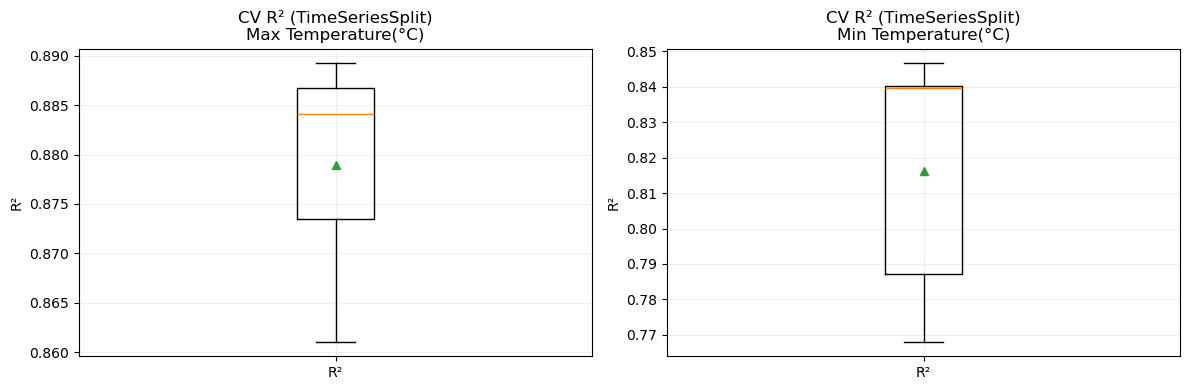

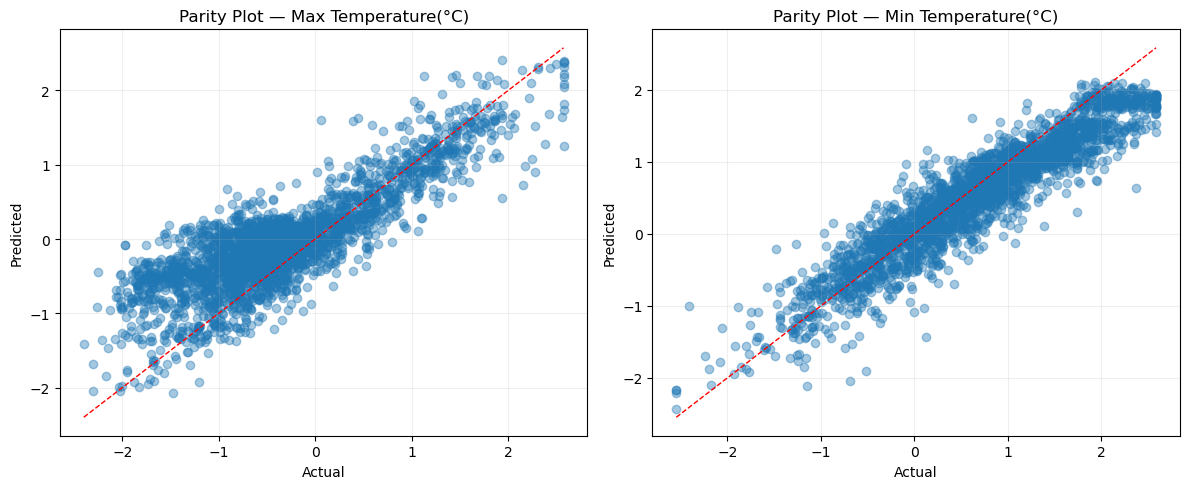

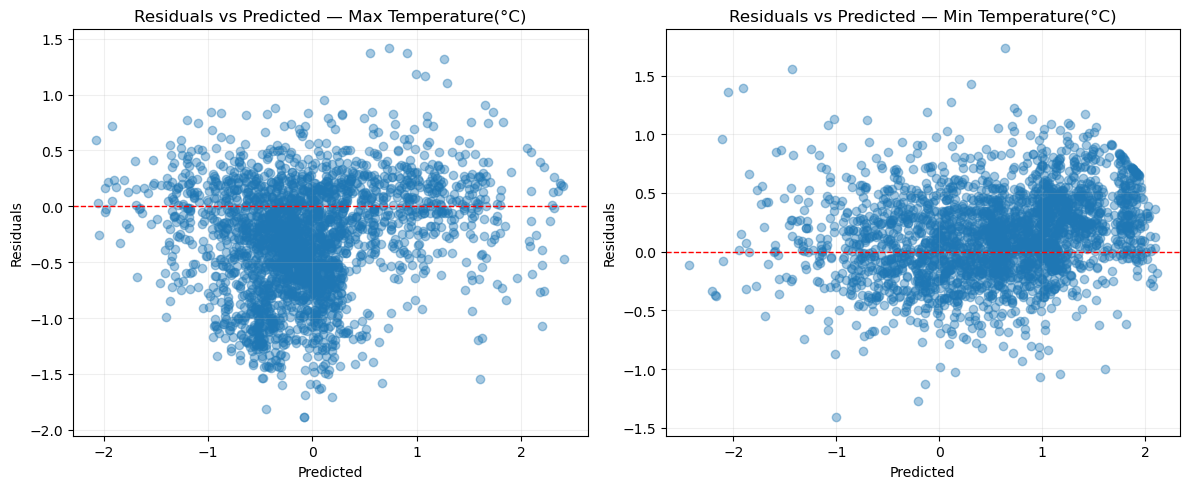

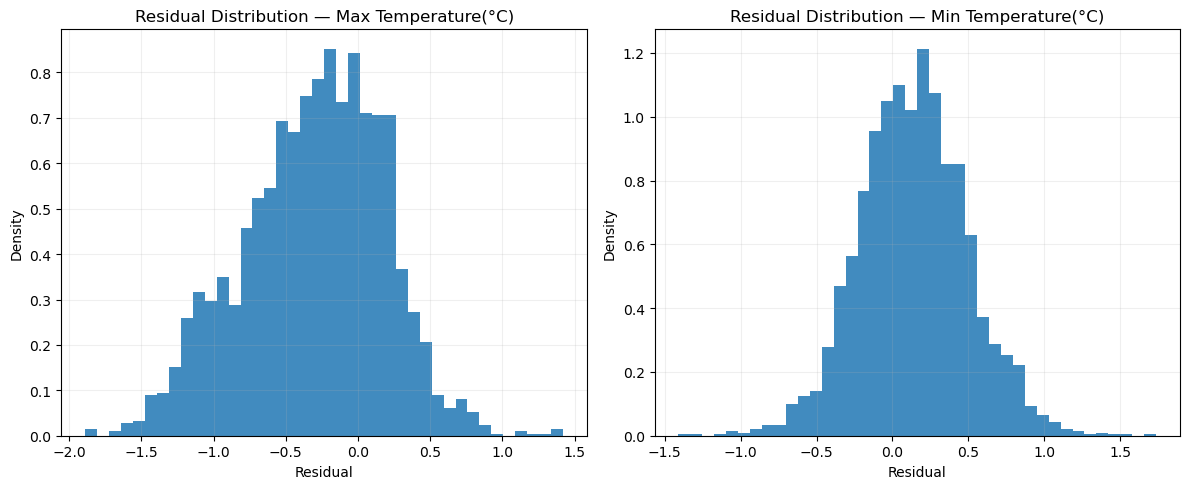

In [147]:
# uses our already-fitted model; no re-fit on test
validate_model_side_by_side(model, X_train, y_train, X_test, y_test,
                            target_names=target_names, n_splits=5, prefit=True)
